In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [1]:
!pip install scikit-learn-extra

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
##############################################################################
cstm = pd.read_csv("Customer_info.csv")
dsc = pd.read_csv("Discount_info.csv")
mkt = pd.read_csv("Marketing_info.csv")
sales = pd.read_csv("Onlinesales_info.csv")
tax = pd.read_csv("Tax_info.csv")

In [4]:
##############################################################################
sales['거래날짜'] = pd.to_datetime(sales['거래날짜'])
mkt['날짜'] = pd.to_datetime(mkt['날짜'])

from datetime import datetime
sales['월'] = sales['거래날짜'].map(lambda x: datetime.strftime(x, '%b'))

dateDict = {0: '월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}
sales['요일'] = sales['거래날짜'].map(lambda x: dateDict[datetime.weekday(x)])

sales['구매금액'] = sales['수량']*sales['평균금액']

In [5]:
##############################################################################
# 데이터 병합
df1 = sales.merge(cstm, on=['고객ID'])
df2 = df1.merge(dsc, on=['월','제품카테고리'])
df3 = df2.merge(mkt, left_on=['거래날짜'], right_on=['날짜'])
df3.drop('날짜', axis=1, inplace=True) # 중복열 제거
df = df3.merge(tax, on=['제품카테고리'])
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,요일,구매금액,성별,고객지역,가입기간,쿠폰코드,할인율,오프라인비용,온라인비용,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,화요일,153.71,남,Chicago,12,ELEC10,10,4500,2424.50,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,화요일,153.71,남,Chicago,12,ELEC10,10,4500,2424.50,0.10
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Not Used,Jan,화요일,245.54,남,Chicago,12,ELEC10,10,4500,2424.50,0.10
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.5,Clicked,Jan,화요일,81.50,남,Chicago,12,ELEC10,10,4500,2424.50,0.10
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,Jan,화요일,153.71,남,Chicago,12,ELEC10,10,4500,2424.50,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,USER_0535,Transaction_21916,2019-11-26,Product_0990,Nest,1,199.00,6.5,Used,Nov,화요일,199.00,남,Chicago,22,NE20,20,3000,1642.31,0.05
52520,USER_0535,Transaction_21918,2019-11-26,Product_0992,Nest,1,99.00,6.5,Used,Nov,화요일,99.00,남,Chicago,22,NE20,20,3000,1642.31,0.05
52521,USER_0535,Transaction_21919,2019-11-26,Product_0994,Nest,1,349.00,6.5,Clicked,Nov,화요일,349.00,남,Chicago,22,NE20,20,3000,1642.31,0.05
52522,USER_0535,Transaction_21920,2019-11-26,Product_0990,Nest,3,199.00,6.5,Used,Nov,화요일,597.00,남,Chicago,22,NE20,20,3000,1642.31,0.05


In [6]:
obj_col = df.select_dtypes('object').columns.tolist()

for col in obj_col:
  print(f'변수 [{col}]의 고유값 개수 : {df[col].nunique()}')

변수 [고객ID]의 고유값 개수 : 1468
변수 [거래ID]의 고유값 개수 : 25000
변수 [제품ID]의 고유값 개수 : 1135
변수 [제품카테고리]의 고유값 개수 : 16
변수 [쿠폰상태]의 고유값 개수 : 3
변수 [월]의 고유값 개수 : 12
변수 [요일]의 고유값 개수 : 7
변수 [성별]의 고유값 개수 : 2
변수 [고객지역]의 고유값 개수 : 5
변수 [쿠폰코드]의 고유값 개수 : 45


In [7]:
df['구매금액'] = df['수량']*df['평균금액']

In [ ]:
#sales['구매금액'] = sales['수량']*sales['평균금액']

In [8]:
# 고객별 소비 현황을 [제품카테고리]별로 pivoting 진행
df_pv = df.pivot_table(index='고객ID',columns='제품카테고리',values='구매금액', aggfunc='sum').fillna(0).reset_index()

df_pv

제품카테고리,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,11.00,0.00
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,9.57,628.0,0.00,3917.00,0.00,255.10,0.00
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,29.99,0.0,0.00,475.00,0.00,224.76,0.00
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,0.00,0.0,303.76,850.12,0.00,0.00,0.00
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,14.00,398.0,0.00,655.00,0.00,46.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,0.00,0.0,0.00,0.00,359.70,0.00,0.00
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,0.00,0.0,0.00,1259.00,166.12,201.53,21.57
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,3.18,0.00
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,298.00,0.00,0.00,0.00


# 파생변수 생성

## 1. LRFMV analysis

In [9]:
## 고객ID별 최근 거래일 도출
df_last = sales.sort_values(['고객ID','거래날짜'], ascending=False)
latest_purchase_index = df_last[['고객ID']].drop_duplicates().index
latest_purchase_date = df_last.loc[lambda x : x.index.isin(latest_purchase_index)]
df_last = latest_purchase_date.sort_values(['고객ID'], ascending=True).reset_index()[['고객ID','거래날짜']]
df_last.rename(columns={'거래날짜':'마지막거래날짜'}, inplace=True)

## 고객ID별 첫 거래일 도출
df_first = sales.sort_values(['고객ID','거래날짜'], ascending=True)
first_purchase_index = df_first[['고객ID']].drop_duplicates().index
first_purchase_date = df_first.loc[lambda x : x.index.isin(first_purchase_index)]
df_first = first_purchase_date.sort_values(['고객ID'], ascending=True).reset_index()[['고객ID','거래날짜']]
df_first.rename(columns={'거래날짜':'처음거래날짜'}, inplace=True)

# Length : 고객의 마지막 거래날짜 - 고객의 처음 거래날짜
# customer’s relation length, the number of time periods (such as days)  from the first  purchase to the  last purchase in the database.
df_length = df_first.merge(df_last, on=['고객ID'])
df_length['L'] = df_length['마지막거래날짜'] - df_length['처음거래날짜']
lrfm_l = df_length[['고객ID','L']]

# Recency : 기준날짜와 최근 거래일자 사이의 간격
df_last['R'] = pd.to_datetime('2019-12-31') - df_last['마지막거래날짜'] # 기준일 : 2019-12-31
lrfm_r = df_last[['고객ID','R']]

# Frequency
lrfm_f = sales.groupby('고객ID')['거래ID'].count().reset_index()
lrfm_f.rename(columns={'거래ID':'F'}, inplace=True)

# Monetary
lrfm_m = sales.groupby('고객ID')['구매금액'].sum().reset_index()
lrfm_m.rename(columns={'구매금액':'M'}, inplace=True)

# Volume
data_n = sales.groupby(['고객ID'])['거래날짜'].nunique().reset_index()
data_x = sales.groupby(['고객ID','거래날짜'])['거래ID'].count().reset_index()
data_q = sales.groupby(['고객ID','거래날짜'])['수량'].sum().reset_index()
data_xq = data_x.merge(data_q, on=['고객ID','거래날짜'])
data_xq['q/x'] = data_xq['수량']/data_xq['거래ID']
data_v = data_xq.groupby('고객ID')['q/x'].sum().reset_index()
lrfm_v = data_v.merge(data_n, on=['고객ID'])
lrfm_v['V'] = lrfm_v['q/x']/lrfm_v['거래날짜']
lrfm_v = lrfm_v[['고객ID','V']]

In [10]:
lrfm = lrfm_l.merge(lrfm_r, on=['고객ID']).merge(lrfm_f, on=['고객ID']).merge(lrfm_m, on=['고객ID']).merge(lrfm_v, on=['고객ID'])
lrfm['L']=lrfm['L'].astype(str)
lrfm['L'] = lrfm['L'].str.extract(r'(\d+)').astype(int)
lrfm['R']=lrfm['R'].astype(str)
lrfm['R'] = lrfm['R'].str.extract(r'(\d+)').astype(int)
lrfm

,고객ID,L,R,F,M,V
0,USER_0000,0,107,2,30.99,1.500000
1,USER_0001,223,59,60,13834.90,4.192903
2,USER_0002,119,73,23,1442.12,13.911765
3,USER_0003,0,17,17,1360.07,1.235294
4,USER_0004,0,107,36,1442.47,1.555556
...,...,...,...,...,...,...
1463,USER_1463,0,270,7,544.34,6.571429
1464,USER_1464,105,87,40,2363.05,3.041958
1465,USER_1465,76,194,8,101.56,1.142857
1466,USER_1466,0,69,1,298.00,2.000000


In [11]:
data = df_pv.merge(lrfm, on='고객ID')
data

,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,...,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze,L,R,F,M,V
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,11.00,0.00,0,107,2,30.99,1.500000
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,...,0.00,3917.00,0.00,255.10,0.00,223,59,60,13834.90,4.192903
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,...,0.00,475.00,0.00,224.76,0.00,119,73,23,1442.12,13.911765
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,...,303.76,850.12,0.00,0.00,0.00,0,17,17,1360.07,1.235294
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,...,0.00,655.00,0.00,46.81,0.00,0,107,36,1442.47,1.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,...,0.00,0.00,359.70,0.00,0.00,0,270,7,544.34,6.571429
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,...,0.00,1259.00,166.12,201.53,21.57,105,87,40,2363.05,3.041958
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,3.18,0.00,76,194,8,101.56,1.142857
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,298.00,0.00,0.00,0.00,0,69,1,298.00,2.000000


## 2. 쿠폰민감도

In [12]:
#시계열 군집분석을 활용한 쿠폰 사용률
from sklearn.cluster import KMeans

#쿠폰 사용여부 현황
sales['쿠폰상태'].value_counts()

Clicked     26926
Used        17904
Not Used     8094
Name: 쿠폰상태, dtype: int64

In [13]:
df_c = df
df_c['월'] = df_c['거래날짜'].dt.month

#쿠폰 할인율 10%,20%,30%에 따라서 동일한 할인율의 월끼리 묶음.
df_c['월']= np.where((df_c['월']==1)|(df_c['월']==4)|(df_c['월']==7)|(df_c['월']==10), 1,
                    np.where((df_c['월']==2)|(df_c['월']==5)|(df_c['월']==8)|(df_c['월']==11), 2,
                           np.where((df_c['월']==3)|(df_c['월']==6)|(df_c['월']==9)|(df_c['월']==12), 3, df_c['월']) ) )

df_c2 = df_c.groupby(['고객ID','거래날짜', '월', '쿠폰상태']).size().reset_index(name='월별 쿠폰 사용 빈도수')

# 고객ID별 월별 쿠폰 사용 빈도수 총합 계산
df_c3 = df_c2.groupby(['월','고객ID'])['월별 쿠폰 사용 빈도수'].sum().reset_index(name='월별 거래 빈도수 총합')

# 고객ID별 월별 빈도수 총합 계산
df_c4 = df_c2[df_c2['쿠폰상태']=="Used"].groupby(['월','고객ID']).size().reset_index(name='월별 쿠폰사용 거래 빈도수 총합')

# 결과 데이터프레임 생성
df_c5 = pd.merge( df_c3, df_c4,on=['월','고객ID'], how='left')

df_c5['월별 쿠폰사용 거래 빈도수 총합'].fillna(0, inplace=True)
df_c5['월별 쿠폰 사용률']= df_c5['월별 쿠폰사용 거래 빈도수 총합']/df_c5['월별 거래 빈도수 총합']
df_c5['월'] = pd.to_datetime('2019-' + df_c5['월'].astype(str), format='%Y-%m')

# 날짜를 인덱스로 설정
df_c5.set_index('월', inplace=True)

In [14]:
# 피벗 테이블을 사용하여 고객별 시계열 데이터로 변환
pivot_df = df_c5.pivot_table(index='고객ID', columns=df_c5.index, values='월별 쿠폰 사용률', aggfunc='sum', fill_value=0)

# 시계열 데이터를 표준화
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(pivot_df)

# KMeans 모델 생성 및 피팅
kmeans = KMeans(n_clusters=2, n_init=10)  # 군집 수는 2로 설정
kmeans.fit(pivot_df)

# 각 고객에 대한 군집 할당
clusters = kmeans.labels_

# 군집 결과를 데이터프레임에 추가
pivot_df['cluster'] = clusters

# 결과 확인
pivot_df.head()

월,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,cluster
고객ID,,,,
USER_0000,0.000000,0.000000,0.500000,0
USER_0001,0.000000,0.068966,0.033333,0
USER_0002,0.166667,0.000000,0.058824,0
USER_0003,0.000000,0.000000,0.058824,0
USER_0004,0.000000,0.000000,0.027778,0


In [15]:
#군집별 개수
pivot_df['cluster'].value_counts()

0    1419
1      49
Name: cluster, dtype: int64

In [17]:
#군집별 평균 쿠폰 사용률의 차이 확인
pivot_df['sum'] = pivot_df.iloc[:, 0:3].sum(axis=1)
print("군집 0의 평균 쿠폰 사용률", pivot_df.loc[pivot_df['cluster']==0, 'sum'].sum()/1419 )
print("군집 1의 평균 쿠폰사용률", pivot_df.loc[pivot_df['cluster']==1, 'sum'].sum()/49)

군집 0의 평균 쿠폰 사용률 0.14333975954930053
군집 1의 평균 쿠폰사용률 0.9143029304783118


In [18]:
#할인율 월별 쿠폰사용률 추세 확인
print("할인율이 10%인 달 (1,4,7,10월) 의 평균 쿠폰사용률", pivot_df.iloc[:,0 ].sum(axis=0) / len(pivot_df))
print("할인율이 20%인 달 (2,5,8,11월) 의 평균 쿠폰사용률", pivot_df.iloc[:,1 ].sum(axis=0)/len(pivot_df))
print("할인율이 30%인 달 (3,6,9,12월) 의 평균 쿠폰사용률", pivot_df.iloc[:,2 ].sum(axis=0)/ len(pivot_df))

할인율이 10%인 달 (1,4,7,10월) 의 평균 쿠폰사용률 0.06294452824366416
할인율이 20%인 달 (2,5,8,11월) 의 평균 쿠폰사용률 0.047600839732015225
할인율이 30%인 달 (3,6,9,12월) 의 평균 쿠폰사용률 0.05852817588937152


In [19]:
df_reset = pivot_df.reset_index()
df_reset .rename(columns={'cluster':'쿠폰민감도'}, inplace=True)
df_reset = df_reset.loc[:, ["고객ID", "쿠폰민감도"]]

In [20]:
#data = data.merge(df_reset, on='고객ID')
data['쿠폰민감도'] = df_reset['쿠폰민감도']
data

,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,...,Nest-USA,Notebooks & Journals,Office,Waze,L,R,F,M,V,쿠폰민감도
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,11.00,0.00,0,107,2,30.99,1.500000,0
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,...,3917.00,0.00,255.10,0.00,223,59,60,13834.90,4.192903,0
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,...,475.00,0.00,224.76,0.00,119,73,23,1442.12,13.911765,0
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,...,850.12,0.00,0.00,0.00,0,17,17,1360.07,1.235294,0
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,...,655.00,0.00,46.81,0.00,0,107,36,1442.47,1.555556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,...,0.00,359.70,0.00,0.00,0,270,7,544.34,6.571429,0
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,...,1259.00,166.12,201.53,21.57,105,87,40,2363.05,3.041958,0
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,3.18,0.00,76,194,8,101.56,1.142857,0
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,298.00,0.00,0.00,0.00,0,69,1,298.00,2.000000,0


## 3. 이용패턴

In [21]:
# 요일별 이용비율
sales['CNT'] = 1
wod = sales.groupby(['고객ID','요일'])['CNT'].count().reset_index()

In [22]:
df_wod = wod.pivot_table(index='고객ID',columns='요일',values='CNT', aggfunc='sum').fillna(0).reset_index()
df_wod['전체요일횟수'] = df_wod.sum(axis='columns')

df_wod['고객ID번호'] = df_wod['고객ID'].str.extract(r'(\d+)').astype(int)
df_wod['월_비율'] = round(df_wod['월요일'] / df_wod['전체요일횟수'],2)
df_wod['화_비율'] = round(df_wod['화요일'] / df_wod['전체요일횟수'],2)
df_wod['수_비율'] = round(df_wod['수요일'] / df_wod['전체요일횟수'],2)
df_wod['목_비율'] = round(df_wod['목요일'] / df_wod['전체요일횟수'],2)
df_wod['금_비율'] = round(df_wod['금요일'] / df_wod['전체요일횟수'],2)
df_wod['토_비율'] = round(df_wod['토요일'] / df_wod['전체요일횟수'],2)
df_wod['일_비율'] = round(df_wod['일요일'] / df_wod['전체요일횟수'],2)

df_wod

요일,고객ID,금요일,목요일,수요일,월요일,일요일,토요일,화요일,전체요일횟수,고객ID번호,월_비율,화_비율,수_비율,목_비율,금_비율,토_비율,일_비율
0,USER_0000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0,0.00,0.0,0.0,0.00,0.00,0.00,1.00
1,USER_0001,4.0,0.0,0.0,0.0,31.0,25.0,0.0,60.0,1,0.00,0.0,0.0,0.00,0.07,0.42,0.52
2,USER_0002,0.0,0.0,0.0,0.0,0.0,23.0,0.0,23.0,2,0.00,0.0,0.0,0.00,0.00,1.00,0.00
3,USER_0003,0.0,0.0,0.0,0.0,0.0,17.0,0.0,17.0,3,0.00,0.0,0.0,0.00,0.00,1.00,0.00
4,USER_0004,0.0,0.0,0.0,0.0,36.0,0.0,0.0,36.0,4,0.00,0.0,0.0,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1463,0.00,0.0,0.0,0.00,1.00,0.00,0.00
1464,USER_1464,0.0,0.0,0.0,0.0,26.0,14.0,0.0,40.0,1464,0.00,0.0,0.0,0.00,0.00,0.35,0.65
1465,USER_1465,7.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1465,0.00,0.0,0.0,0.12,0.88,0.00,0.00
1466,USER_1466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1466,0.00,0.0,1.0,0.00,0.00,0.00,0.00


### k-means로 군집화

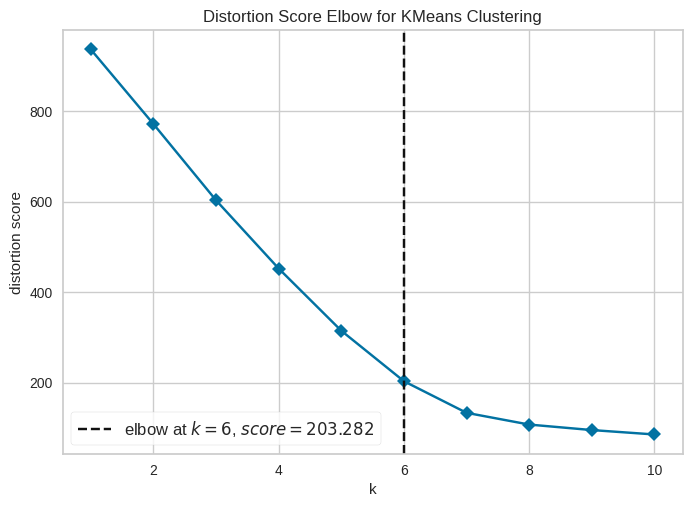

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
km_wod = df_wod.iloc[:,10:]

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=17)
visualizer = KElbowVisualizer(kmeans, k=(1,11), timings=False)
visualizer.fit(km_wod)
visualizer.show()

cluster : 2 // silhouette index 0.2314530311969069
cluster : 3 // silhouette index 0.3326788971867498
cluster : 4 // silhouette index 0.43015274126082087
cluster : 5 // silhouette index 0.521743716274317
cluster : 6 // silhouette index 0.592598004226282
cluster : 7 // silhouette index 0.6406759172616977
cluster : 8 // silhouette index 0.6308230642439863
cluster : 9 // silhouette index 0.6311059782363561
cluster : 10 // silhouette index 0.6312203461643069


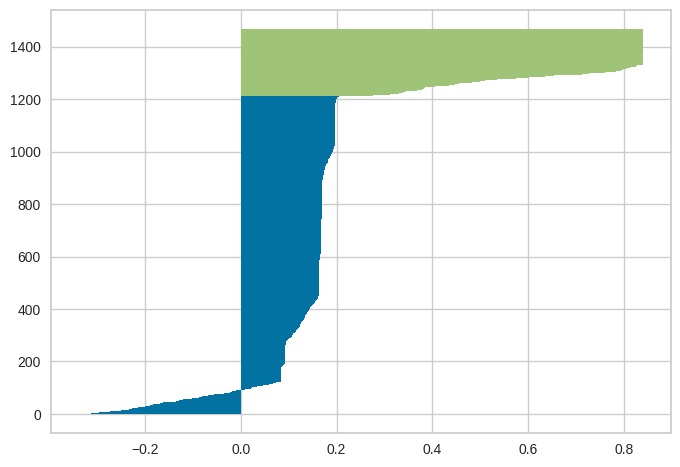

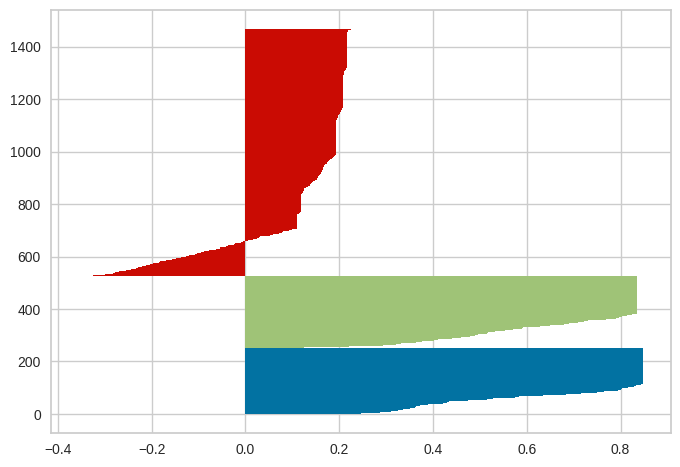

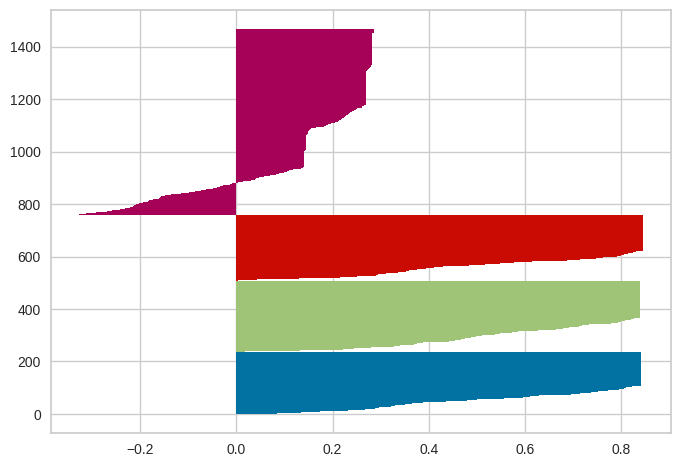

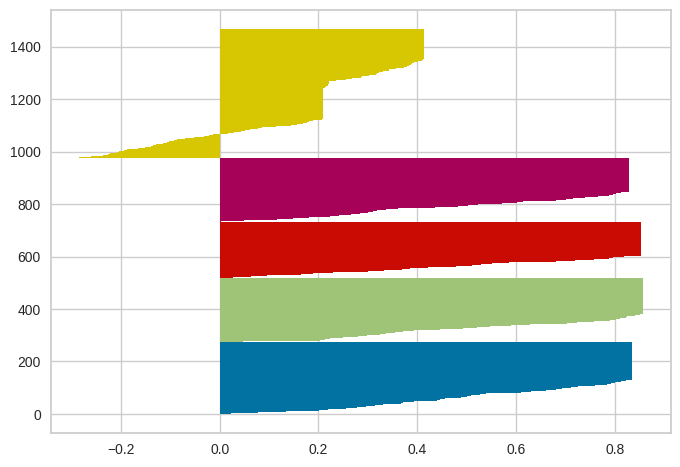

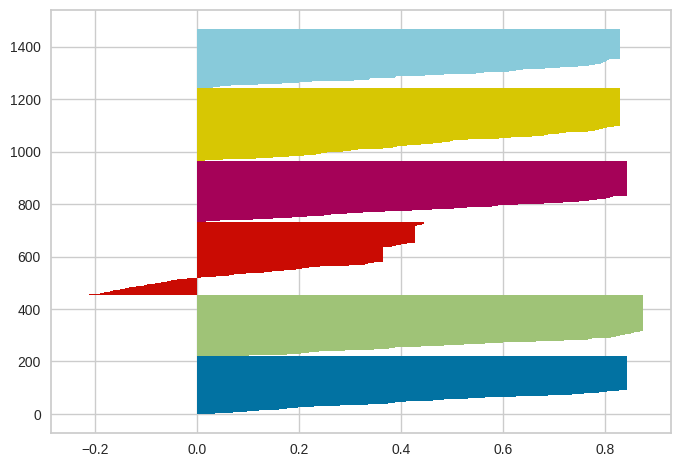

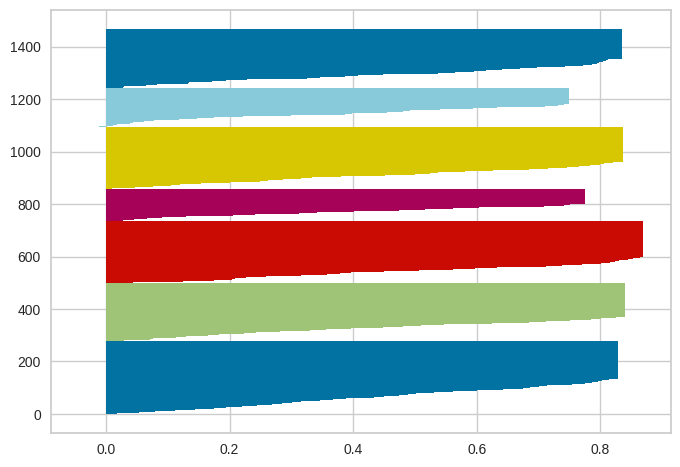

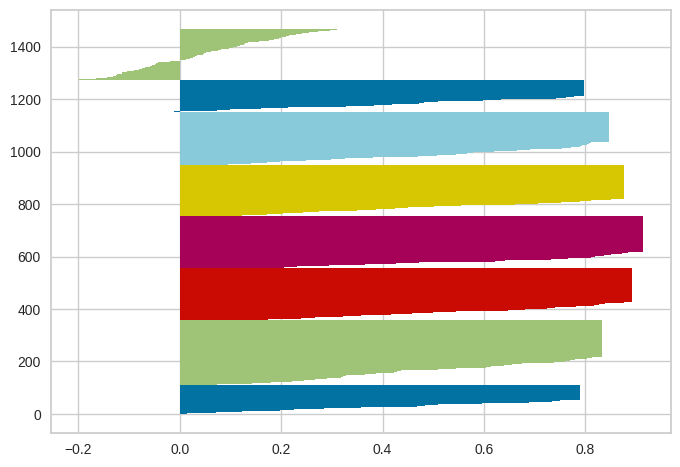

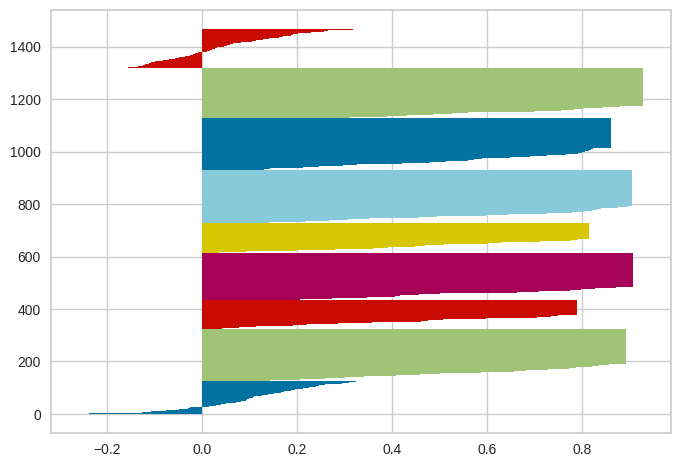

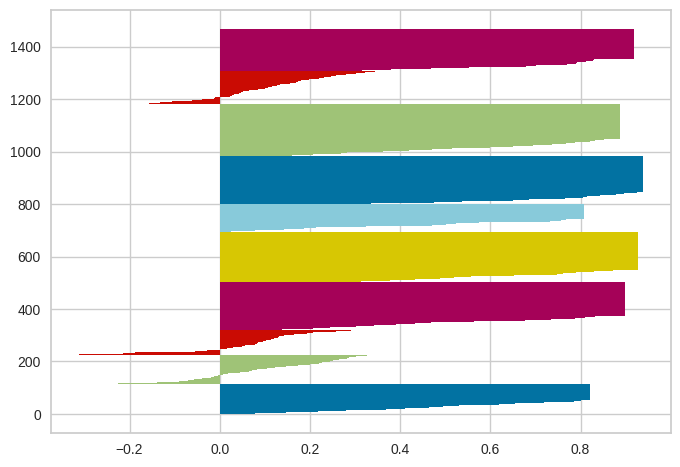

In [25]:
from sklearn.metrics import silhouette_score, silhouette_samples

for k in range(2, 11):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=17).fit(km_wod)

    silhouette_avg = silhouette_score(km_wod, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')

    silhouette_vals = silhouette_samples(km_wod, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() # numpy array는 sort 메소드를 이용하면 오름차순으로 정렬된 형태로 바뀜

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

In [26]:
km_wod = df_wod.iloc[:,10:]

k = 7

# 그룹 수, random_state 설정
km_model = KMeans(n_clusters = k, random_state = 17)

# 정규화된 데이터에 학습
km_model.fit(km_wod)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
km_wod['군집'] = km_model.fit_predict(km_wod)

In [27]:
km_wod['군집'].value_counts()

0    278
4    237
2    236
6    224
1    221
5    150
3    122
Name: 군집, dtype: int64

<Axes: xlabel='요일', ylabel='군집'>

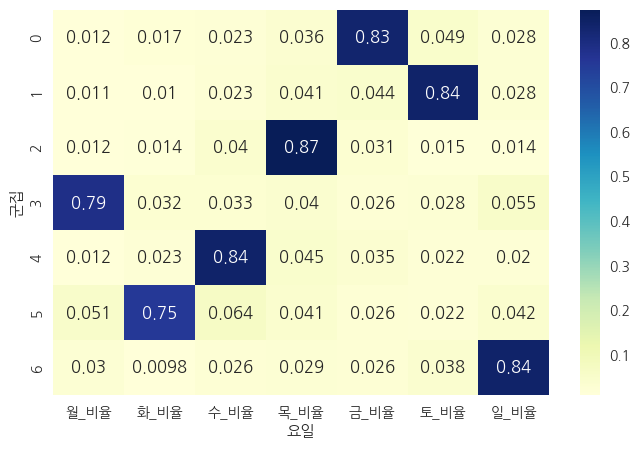

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(km_wod.groupby('군집').mean(), annot=True, cmap="YlGnBu")

In [31]:
data['이용패턴'] = km_wod['군집']
data

,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,...,Notebooks & Journals,Office,Waze,L,R,F,M,V,쿠폰민감도,이용패턴
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,11.00,0.00,0,107,2,30.99,1.500000,0,6
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,...,0.00,255.10,0.00,223,59,60,13834.90,4.192903,0,6
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,...,0.00,224.76,0.00,119,73,23,1442.12,13.911765,0,1
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,...,0.00,0.00,0.00,0,17,17,1360.07,1.235294,0,1
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,...,0.00,46.81,0.00,0,107,36,1442.47,1.555556,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,...,359.70,0.00,0.00,0,270,7,544.34,6.571429,0,0
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,...,166.12,201.53,21.57,105,87,40,2363.05,3.041958,0,6
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,3.18,0.00,76,194,8,101.56,1.142857,0,0
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0,69,1,298.00,2.000000,0,4


## 4. 마케팅 비용

<Axes: xlabel='날짜', ylabel='오프라인비용'>

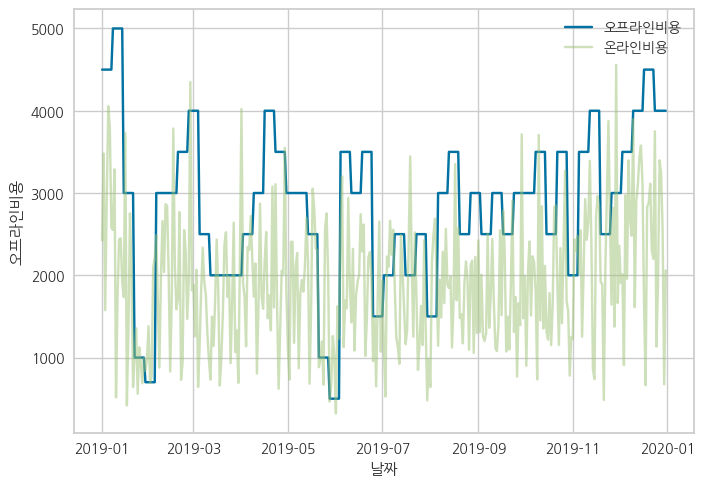

In [32]:
sns.lineplot(x='날짜', y='오프라인비용', data=mkt, label='오프라인비용')
sns.lineplot(x='날짜', y='온라인비용', data=mkt, alpha=0.5, label='온라인비용')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2019-01-01'),
  Text(1, 0, '2019-01-02'),
  Text(2, 0, '2019-01-03'),
  Text(3, 0, '2019-01-04'),
  Text(4, 0, '2019-01-05'),
  Text(5, 0, '2019-01-06'),
  Text(6, 0, '2019-01-07'),
  Text(7, 0, '2019-01-08'),
  Text(8, 0, '2019-01-09'),
  Text(9, 0, '2019-01-10'),
  Text(10, 0, '2019-01-11'),
  Text(11, 0, '2019-01-12'),
  Text(12, 0, '2019-01-13'),
  Text(13, 0, '2019-01-14'),
  Text(14, 0, '2019-01-15'),
  Text(15, 0, '2019-01-16'),
  Text(16, 0, '2019-01-17'),
  Text(17, 0, '2019-01-18'),
  Text(18, 0, '2019-01-19'),
  Text(19, 0, '2019-01-20'),
  Text(20, 0, '2019-01-21'),
  Text(21, 0, '2019-01-22'),
  Text(22, 0, '2019-01-23'),
  Text(23, 0, '2019-01-24'),
  Text(24, 0, '2019-01-25'),
  Text(25, 0, '2019-01-26')])

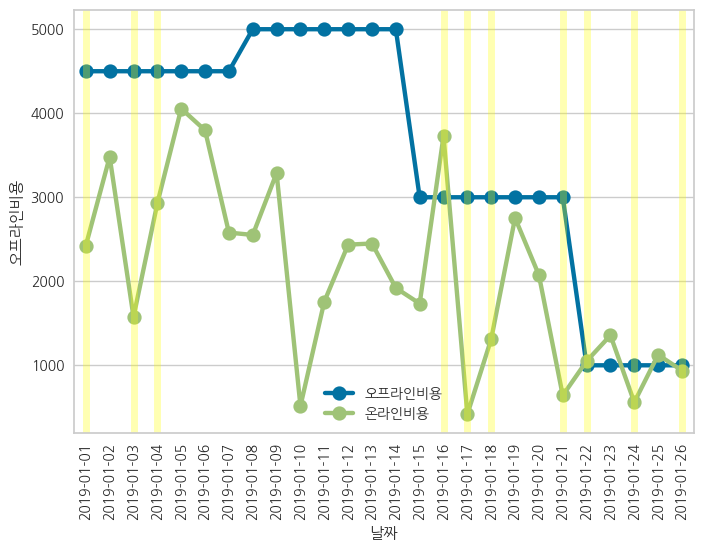

In [33]:
sns.pointplot(data = mkt.iloc[:26,], x = "날짜", y = "오프라인비용", label='오프라인비용')
sns.pointplot(data = mkt.iloc[:26,], x = "날짜", y = "온라인비용", label='온라인비용')
#sns.pointplot(data = df[df.고객ID == 'USER_1358'], x = "거래날짜", y = 6000, linestyle='', marker="*", color='red')
#plt.axvspan(df[df.고객ID == 'USER_1358']['거래날짜'], alpha=0.5, color='red', xmax=14)

date_hl = sales[sales.고객ID == 'USER_1358']['거래날짜'].astype(str).unique().tolist()
for i in date_hl:
  plt.axvline(i, linewidth=5, alpha=0.3, color='yellow')
plt.xticks(rotation=90)

### 4.1 온라인 비용 (0~1)

In [34]:
online_rate = df.groupby(['고객ID'])['온라인비용'].sum().reset_index()
online_rate['온라인비용비율'] =  (online_rate['온라인비용']-online_rate['온라인비용'].min())/(online_rate['온라인비용'].max()-online_rate['온라인비용'].min())
online_rate

,고객ID,온라인비용,온라인비용비율
0,USER_0000,5093.34,0.003642
1,USER_0001,125355.54,0.097325
2,USER_0002,47477.33,0.036659
3,USER_0003,58383.27,0.045154
4,USER_0004,91680.12,0.071092
...,...,...,...
1463,USER_1463,14056.08,0.010624
1464,USER_1464,93019.34,0.072136
1465,USER_1465,17418.35,0.013243
1466,USER_1466,1153.81,0.000573


In [35]:
data['온라인반응도'] = online_rate['온라인비용비율']
data

,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,...,Office,Waze,L,R,F,M,V,쿠폰민감도,이용패턴,온라인반응도
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,...,11.00,0.00,0,107,2,30.99,1.500000,0,6,0.003642
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,...,255.10,0.00,223,59,60,13834.90,4.192903,0,6,0.097325
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,...,224.76,0.00,119,73,23,1442.12,13.911765,0,1,0.036659
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,...,0.00,0.00,0,17,17,1360.07,1.235294,0,1,0.045154
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,...,46.81,0.00,0,107,36,1442.47,1.555556,0,6,0.071092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,...,0.00,0.00,0,270,7,544.34,6.571429,0,0,0.010624
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,...,201.53,21.57,105,87,40,2363.05,3.041958,0,6,0.072136
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,...,3.18,0.00,76,194,8,101.56,1.142857,0,0,0.013243
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0,69,1,298.00,2.000000,0,4,0.000573


### 4.2 오프라인 비용

<Axes: xlabel='오프라인비용', ylabel='구매금액'>

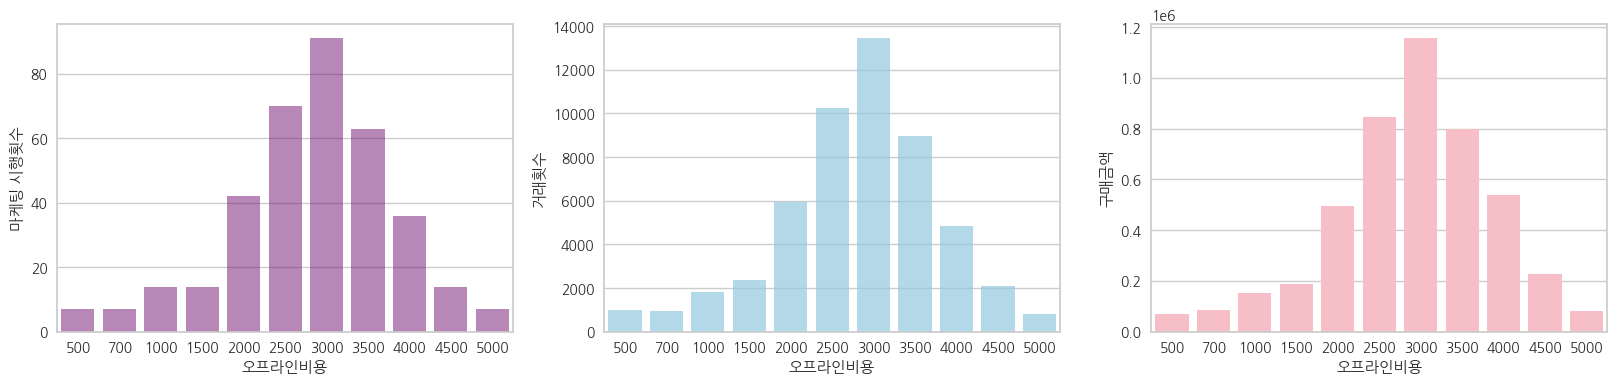

In [36]:
plt.figure(figsize=(20,4))

plt.subplot(131)
sns.barplot(x='index', y='오프라인비용', data=mkt['오프라인비용'].value_counts().reset_index(), color='purple', alpha=0.5)
plt.xlabel('오프라인비용')
plt.ylabel('마케팅 시행횟수')

plt.subplot(132)
sns.barplot(x='index', y='오프라인비용', data=df['오프라인비용'].value_counts().reset_index(), color='skyblue', alpha=0.7)
plt.xlabel('오프라인비용')
plt.ylabel('거래횟수')

plt.subplot(133)
sns.barplot(x='오프라인비용', y='구매금액', data=df.groupby('오프라인비용')['구매금액'].sum().reset_index(), color='lightpink')

In [37]:
mkt_count = mkt['오프라인비용'].value_counts().reset_index()
mkt_count.rename(columns={'오프라인비용':'마케팅시행횟수','index':'오프라인비용'}, inplace=True)
mkt_count

mkt_trancount = df['오프라인비용'].value_counts().reset_index()
mkt_trancount.rename(columns={'오프라인비용':'거래횟수','index':'오프라인비용'}, inplace=True)
mkt_trancount


mkt_off = mkt_count.merge(mkt_trancount, on='오프라인비용').merge(df.groupby('오프라인비용')['구매금액'].sum().reset_index(), on='오프라인비용')
mkt_off['시행횟수대비거래횟수'] = mkt_off['거래횟수']/mkt_off['마케팅시행횟수']
mkt_off['시행횟수대비구매금액'] = mkt_off['구매금액']/mkt_off['마케팅시행횟수']
mkt_off

,오프라인비용,마케팅시행횟수,거래횟수,구매금액,시행횟수대비거래횟수,시행횟수대비구매금액
0,3000,91,13438,1156145.81,147.670330,12704.899011
1,2500,70,10248,846148.35,146.400000,12087.833571
2,3500,63,8954,798957.68,142.126984,12681.867937
3,2000,42,5958,496680.91,141.857143,11825.735952
4,4000,36,4858,540654.34,134.944444,15018.176111
5,4500,14,2103,225855.45,150.214286,16132.532143
6,1000,14,1818,152228.40,129.857143,10873.457143
7,1500,14,2391,189530.17,170.785714,13537.869286
8,5000,7,825,82135.66,117.857143,11733.665714
9,700,7,955,84552.52,136.428571,12078.931429


<Axes: xlabel='오프라인비용', ylabel='시행횟수대비구매금액'>

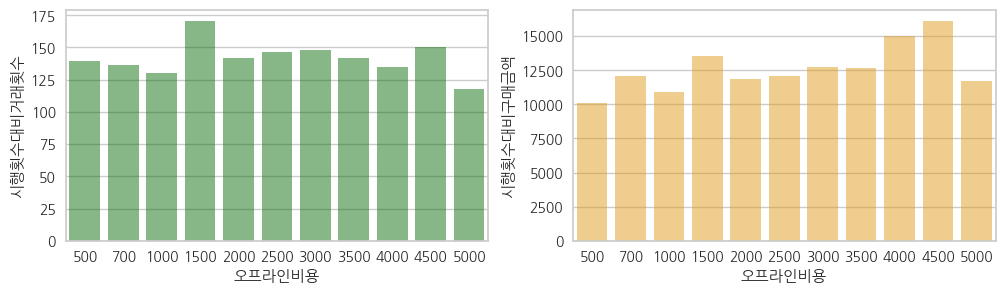

In [38]:
plt.figure(figsize=(12,3))

plt.subplot(121)
sns.barplot(x='오프라인비용', y='시행횟수대비거래횟수', data=mkt_off, color='green', alpha=0.5)

plt.subplot(122)
sns.barplot(x='오프라인비용', y='시행횟수대비구매금액', data=mkt_off, color='orange', alpha=0.5)


In [39]:
mkt_off2 = df.groupby(['고객ID','오프라인비용'])['구매금액'].sum().reset_index()
mkt_off3 = mkt_off2.merge(mkt_count, on='오프라인비용')
mkt_off3['시행횟수대비구매금액'] = mkt_off3['구매금액'] / mkt_off3['마케팅시행횟수']
mkt_off4 = mkt_off3.sort_values(by=['고객ID','오프라인비용'])
mkt_off5 = mkt_off4.pivot_table(index='고객ID',columns='오프라인비용',values='시행횟수대비구매금액', aggfunc='sum').fillna(0).reset_index()
mkt_off5

오프라인비용,고객ID,500,700,1000,1500,2000,2500,3000,3500,4000,4500,5000
0,USER_0000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.340549,0.000000,0.000000,0.0,0.0
1,USER_0001,0.0,0.0,0.0,0.0,328.869524,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,USER_0002,0.0,0.0,0.0,0.0,0.000000,9.501286,0.000000,12.333810,0.000000,0.0,0.0
3,USER_0003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,37.779722,0.0,0.0
4,USER_0004,0.0,0.0,0.0,0.0,0.000000,0.000000,15.851319,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.0,0.0,0.0,0.0,0.000000,7.525000,0.000000,0.000000,0.000000,0.0,0.0
1464,USER_1464,0.0,0.0,0.0,0.0,0.000000,0.000000,11.726923,19.826984,0.000000,0.0,0.0
1465,USER_1465,0.0,0.0,0.0,0.0,0.000000,1.241000,0.000000,0.233175,0.000000,0.0,0.0
1466,USER_1466,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.730159,0.000000,0.0,0.0


In [40]:
mkt_off5['오프라인비용_하'] = mkt_off5[500] + mkt_off5[700] + mkt_off5[1000]
mkt_off5['오프라인비용_중'] = mkt_off5[1500] + mkt_off5[2000] + mkt_off5[2500] + mkt_off5[3000]
mkt_off5['오프라인비용_상'] = mkt_off5[3500] + mkt_off5[4000] + mkt_off5[4500] + mkt_off5[5000]
mkt_off5

오프라인비용,고객ID,500,700,1000,1500,2000,2500,3000,3500,4000,4500,5000,오프라인비용_하,오프라인비용_중,오프라인비용_상
0,USER_0000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.340549,0.000000,0.000000,0.0,0.0,0.0,0.340549,0.000000
1,USER_0001,0.0,0.0,0.0,0.0,328.869524,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,328.869524,0.000000
2,USER_0002,0.0,0.0,0.0,0.0,0.000000,9.501286,0.000000,12.333810,0.000000,0.0,0.0,0.0,9.501286,12.333810
3,USER_0003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,37.779722,0.0,0.0,0.0,0.000000,37.779722
4,USER_0004,0.0,0.0,0.0,0.0,0.000000,0.000000,15.851319,0.000000,0.000000,0.0,0.0,0.0,15.851319,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.0,0.0,0.0,0.0,0.000000,7.525000,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.525000,0.000000
1464,USER_1464,0.0,0.0,0.0,0.0,0.000000,0.000000,11.726923,19.826984,0.000000,0.0,0.0,0.0,11.726923,19.826984
1465,USER_1465,0.0,0.0,0.0,0.0,0.000000,1.241000,0.000000,0.233175,0.000000,0.0,0.0,0.0,1.241000,0.233175
1466,USER_1466,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.730159,0.000000,0.0,0.0,0.0,0.000000,4.730159


In [41]:
mkt_off6 = mkt_off5.iloc[:,12:]
mkt_off5['오프라인반응도'] = '반응없음'
for i in range(0,1468):
  if mkt_off6.sum(axis=1)[i] != 0 :
    mkt_off5.loc[i,'오프라인반응도'] = mkt_off6.iloc[i].idxmax(axis=0)

In [42]:
mkt_off5['오프라인반응도'] = mkt_off5['오프라인반응도'].replace({'오프라인비용_중':'중', '오프라인비용_하':'하', '오프라인비용_상':'상'})
mkt_off5

오프라인비용,고객ID,500,700,1000,1500,2000,2500,3000,3500,4000,4500,5000,오프라인비용_하,오프라인비용_중,오프라인비용_상,오프라인반응도
0,USER_0000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.340549,0.000000,0.000000,0.0,0.0,0.0,0.340549,0.000000,중
1,USER_0001,0.0,0.0,0.0,0.0,328.869524,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,328.869524,0.000000,중
2,USER_0002,0.0,0.0,0.0,0.0,0.000000,9.501286,0.000000,12.333810,0.000000,0.0,0.0,0.0,9.501286,12.333810,상
3,USER_0003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,37.779722,0.0,0.0,0.0,0.000000,37.779722,상
4,USER_0004,0.0,0.0,0.0,0.0,0.000000,0.000000,15.851319,0.000000,0.000000,0.0,0.0,0.0,15.851319,0.000000,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.0,0.0,0.0,0.0,0.000000,7.525000,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.525000,0.000000,중
1464,USER_1464,0.0,0.0,0.0,0.0,0.000000,0.000000,11.726923,19.826984,0.000000,0.0,0.0,0.0,11.726923,19.826984,상
1465,USER_1465,0.0,0.0,0.0,0.0,0.000000,1.241000,0.000000,0.233175,0.000000,0.0,0.0,0.0,1.241000,0.233175,중
1466,USER_1466,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.730159,0.000000,0.0,0.0,0.0,0.000000,4.730159,상


In [43]:
data = pd.concat([data, mkt_off5['오프라인반응도']], axis=1)
data

,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,...,Waze,L,R,F,M,V,쿠폰민감도,이용패턴,온라인반응도,오프라인반응도
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0,107,2,30.99,1.500000,0,6,0.003642,중
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,...,0.00,223,59,60,13834.90,4.192903,0,6,0.097325,중
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,...,0.00,119,73,23,1442.12,13.911765,0,1,0.036659,상
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,...,0.00,0,17,17,1360.07,1.235294,0,1,0.045154,상
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,...,0.00,0,107,36,1442.47,1.555556,0,6,0.071092,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,...,0.00,0,270,7,544.34,6.571429,0,0,0.010624,중
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,...,21.57,105,87,40,2363.05,3.041958,0,6,0.072136,상
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,76,194,8,101.56,1.142857,0,0,0.013243,중
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0,69,1,298.00,2.000000,0,4,0.000573,상


# 군집분석

In [44]:
df = data[['L','R','F','M','V']]

In [45]:
# 여러 컬럼에 대해서 n회 이상 나온 이상치 인덱스만 추출
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices) # 중복 제거 list(set(outlier_indices)) 도 가능
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) # n회 이상

    return multiple_outliers

Outliers_to_drop = detect_outliers(df, 5, df.columns)
len(Outliers_to_drop)

0

In [ ]:
!pip install scikit-learn-extra

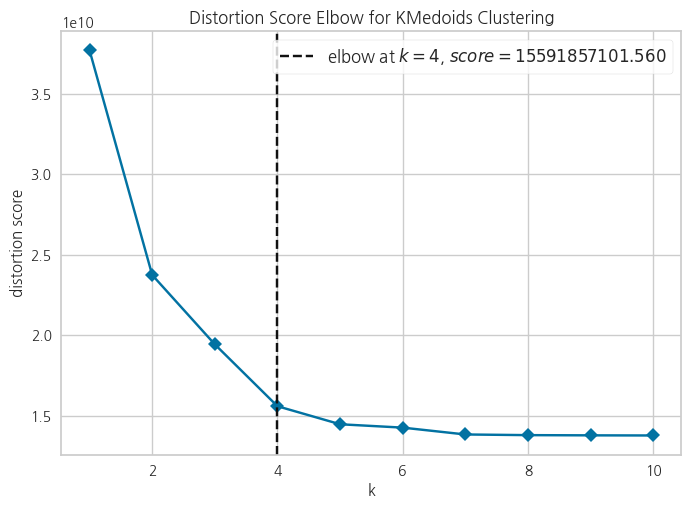

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

k=2
kmedoids = KMedoids(n_clusters=k, random_state=17).fit(df)
visualizer = KElbowVisualizer(kmedoids, k=(1,11), timings=False)
visualizer.fit(df)
visualizer.show()

cluster : 3 // silhouette index 0.5304466201836566
cluster : 4 // silhouette index 0.5303655481406144
cluster : 5 // silhouette index 0.48537035431528386
cluster : 6 // silhouette index 0.46284549374336525
cluster : 7 // silhouette index 0.45016632115346294
cluster : 8 // silhouette index 0.43229067115833986
cluster : 9 // silhouette index 0.4121920545197556
cluster : 10 // silhouette index 0.3978159818966162


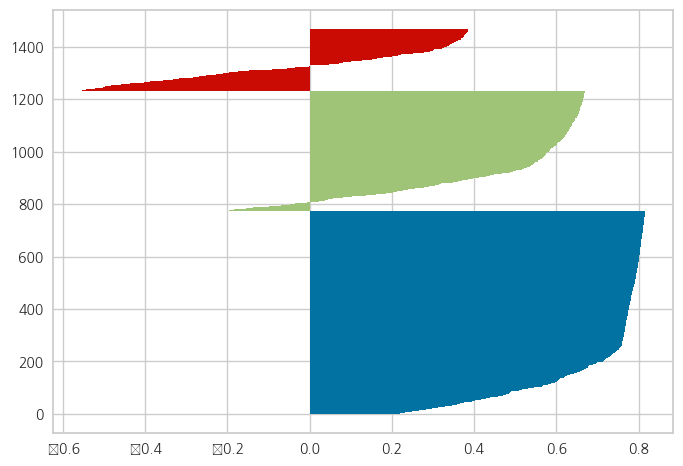

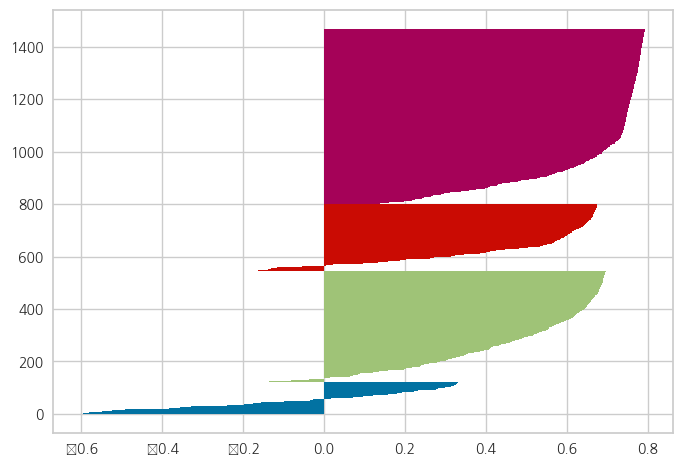

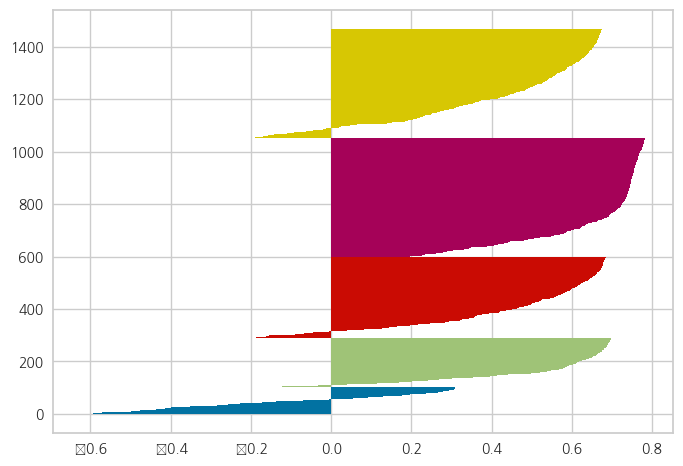

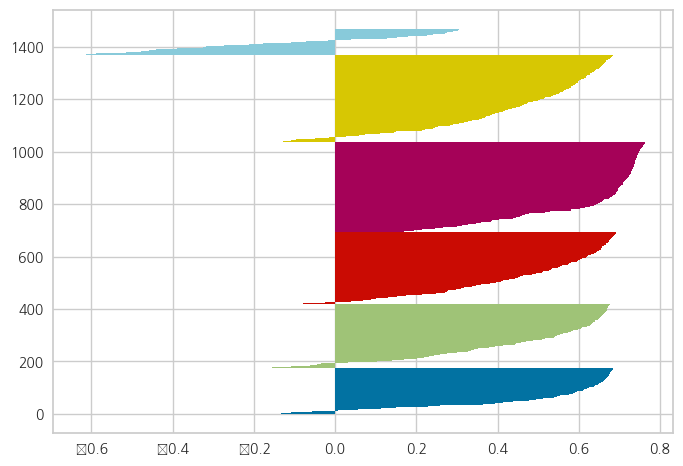

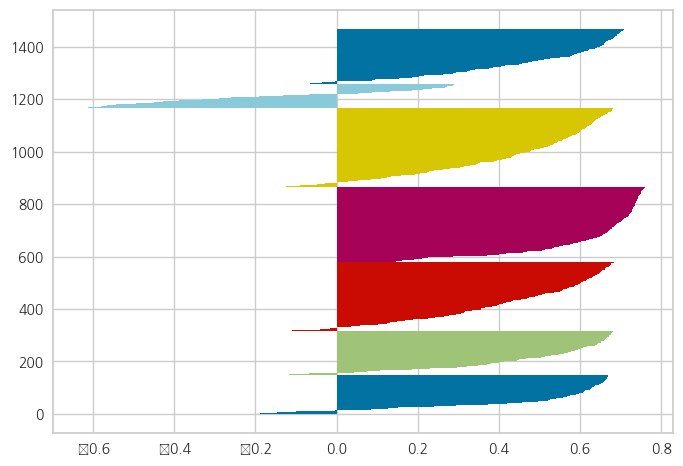

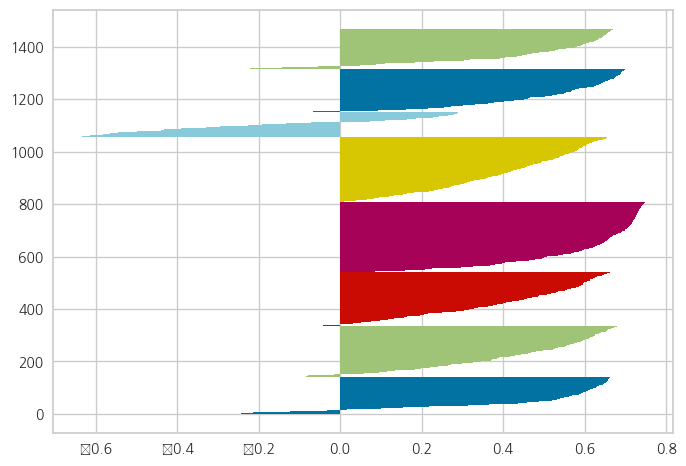

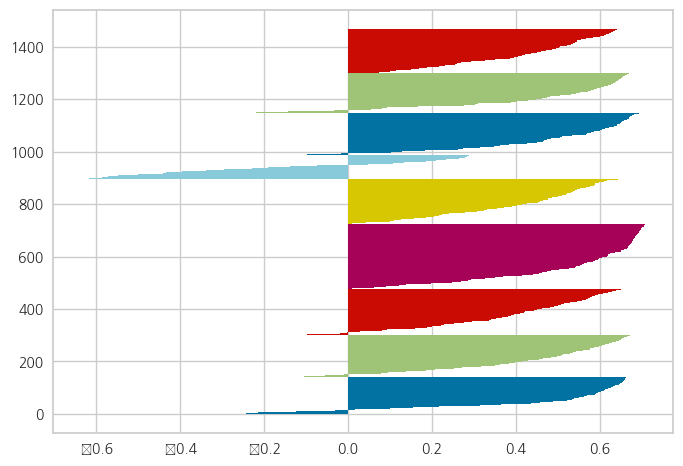

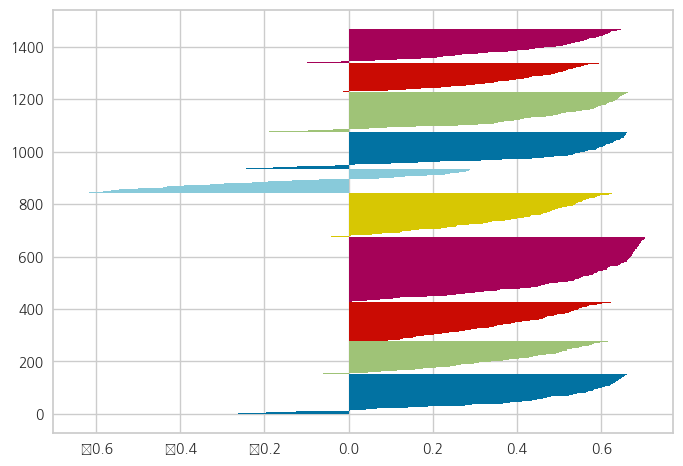

In [47]:
from sklearn.metrics import silhouette_score, silhouette_samples

for k in range(3, 11):
    fig, ax = plt.subplots(1, 1)
    kmedoids = KMedoids(n_clusters=k, random_state=17).fit(df)

    silhouette_avg = silhouette_score(df, kmedoids.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')

    silhouette_vals = silhouette_samples(df, kmedoids.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(kmedoids.labels_):
        cluster_silhouette_vals = silhouette_vals[kmedoids.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() # numpy array는 sort 메소드를 이용하면 오름차순으로 정렬된 형태로 바뀜

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

In [48]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=4, random_state=17)

# 정규화된 데이터에 학습
kmedoids.fit(df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data['군집'] = kmedoids.fit_predict(df)

In [49]:
data

,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,...,L,R,F,M,V,쿠폰민감도,이용패턴,온라인반응도,오프라인반응도,군집
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,...,0,107,2,30.99,1.500000,0,6,0.003642,중,3
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,...,223,59,60,13834.90,4.192903,0,6,0.097325,중,0
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,...,119,73,23,1442.12,13.911765,0,1,0.036659,상,3
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,...,0,17,17,1360.07,1.235294,0,1,0.045154,상,3
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,...,0,107,36,1442.47,1.555556,0,6,0.071092,중,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,...,0,270,7,544.34,6.571429,0,0,0.010624,중,3
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,...,105,87,40,2363.05,3.041958,0,6,0.072136,상,1
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,...,76,194,8,101.56,1.142857,0,0,0.013243,중,3
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0,69,1,298.00,2.000000,0,4,0.000573,상,3


## 군집 분류 시각화

#### 1. R, F의 관계에서 군집의 분류

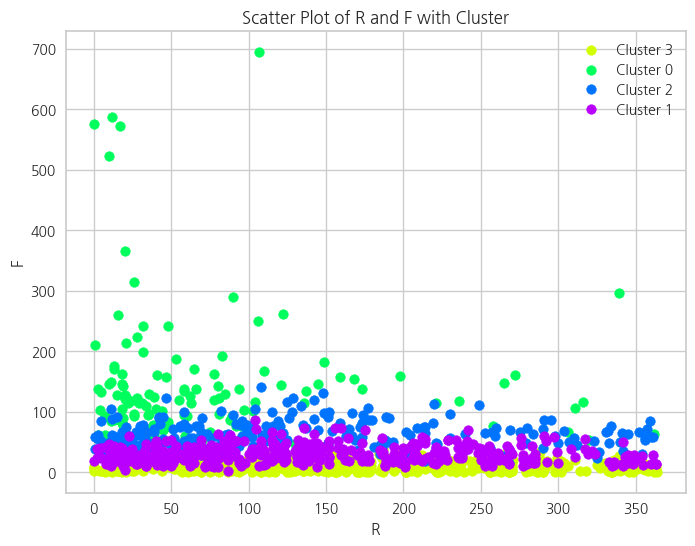

In [109]:
# 그래프 시각화
plt.figure(figsize=(8, 6))

df_g = data.iloc[:, 17:27]

# 군집별로 색상을 지정하기 위한 팔레트 생성
palette = sns.color_palette("hsv", len(df_g['군집'].unique()))

# 군집별로 데이터포인트를 다른 색상으로 표시
for i, cluster in enumerate(df_g['군집'].unique()):
    cluster_data = df_g[df_g['군집'] == cluster]
    plt.scatter(cluster_data['R'], cluster_data['F'], color=palette[i], label=f'Cluster {cluster}')

plt.xlabel('R')
plt.ylabel('F')
plt.title('Scatter Plot of R and F with Cluster')
plt.legend()
plt.grid(True)
plt.show()

#### 2. L과 M의 관계에서 군집의 분류

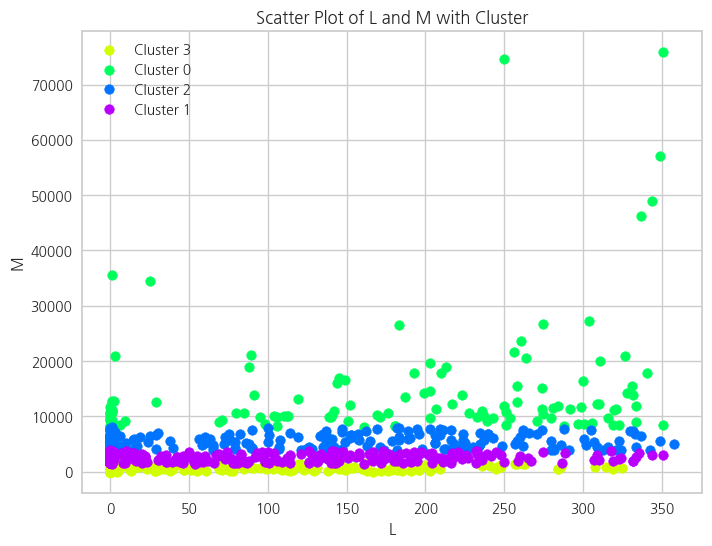

In [110]:
# 그래프 시각화
plt.figure(figsize=(8, 6))

# 군집별로 색상을 지정하기 위한 팔레트 생성
palette = sns.color_palette("hsv", len(df_g['군집'].unique()))

# 군집별로 데이터포인트를 다른 색상으로 표시
for i, cluster in enumerate(df_g['군집'].unique()):
    cluster_data = df_g[df_g['군집'] == cluster]
    plt.scatter(cluster_data['L'], cluster_data['M'], color=palette[i], label=f'Cluster {cluster}')

plt.xlabel('L')
plt.ylabel('M')
plt.title('Scatter Plot of L and M with Cluster')
plt.legend()
plt.grid(True)
plt.show()

#### 3. R과 M의 관계에서 군집의 분류

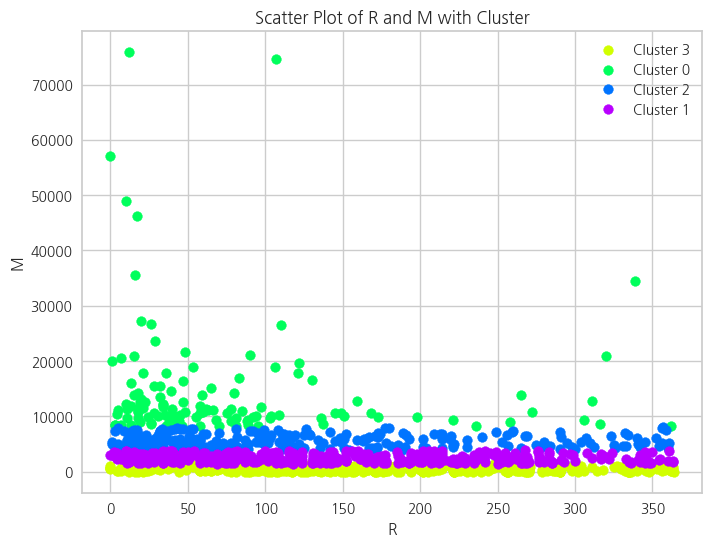

In [111]:
# 그래프 시각화
plt.figure(figsize=(8, 6))

# 군집별로 색상을 지정하기 위한 팔레트 생성
palette = sns.color_palette("hsv", len(df_g['군집'].unique()))

# 군집별로 데이터포인트를 다른 색상으로 표시
for i, cluster in enumerate(df_g['군집'].unique()):
    cluster_data = df_g[df_g['군집'] == cluster]
    plt.scatter(cluster_data['R'], cluster_data['M'], color=palette[i], label=f'Cluster {cluster}')

plt.xlabel('R')
plt.ylabel('M')
plt.title('Scatter Plot of R and M with Cluster')
plt.legend()
plt.grid(True)
plt.show()

#### 3. F와 M의 관계에서 군집의 분류

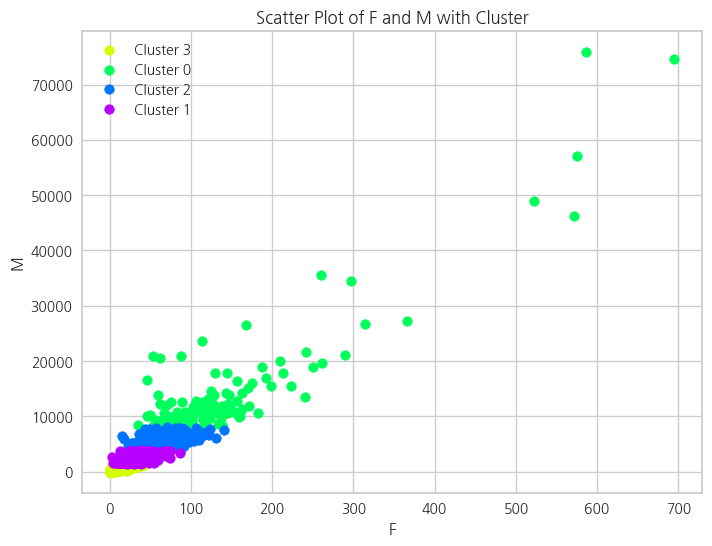

In [112]:
# 그래프 시각화
plt.figure(figsize=(8, 6))

# 군집별로 색상을 지정하기 위한 팔레트 생성
palette = sns.color_palette("hsv", len(df_g['군집'].unique()))

# 군집별로 데이터포인트를 다른 색상으로 표시
for i, cluster in enumerate(df_g['군집'].unique()):
    cluster_data = df_g[df_g['군집'] == cluster]
    plt.scatter(cluster_data['F'], cluster_data['M'], color=palette[i], label=f'Cluster {cluster}')

plt.xlabel('F')
plt.ylabel('M')
plt.title('Scatter Plot of F and M with Cluster')
plt.legend()
plt.grid(True)
plt.show()

#### 4. R,M,F 에서의 군집 분류

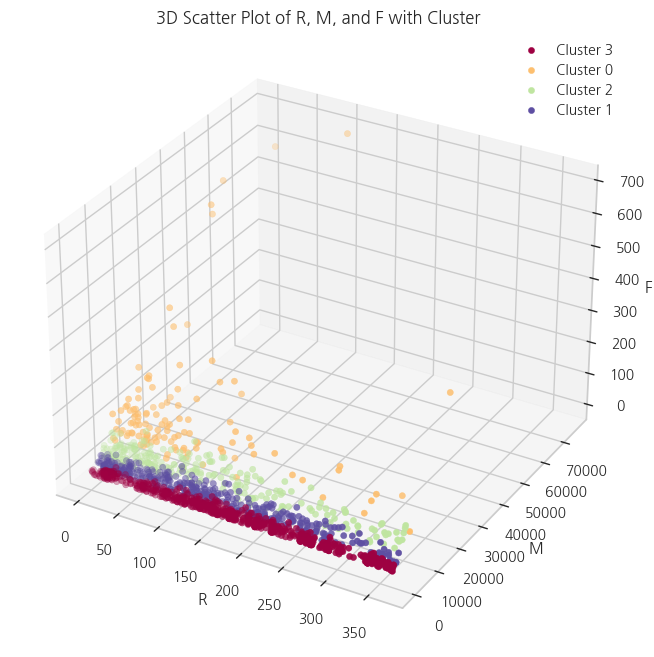

In [113]:
# 3차원 그래프 그리기
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 군집별로 색상을 지정하기 위한 팔레트 생성
palette = plt.cm.Spectral(np.linspace(0, 1, len(df_g['군집'].unique())))

# 군집별로 데이터 포인트를 다른 색상으로 표시
for i, cluster in enumerate(df_g['군집'].unique()):
    cluster_data = df_g[df_g['군집'] == cluster]
    ax.scatter(cluster_data['R'], cluster_data['M'], cluster_data['F'], color=palette[i], label=f'Cluster {cluster}')

ax.set_xlabel('R')
ax.set_ylabel('M')
ax.set_zlabel('F')
ax.set_title('3D Scatter Plot of R, M, and F with Cluster')
ax.legend()
plt.show()

#### 5. L,M,F 에서의 군집 분류

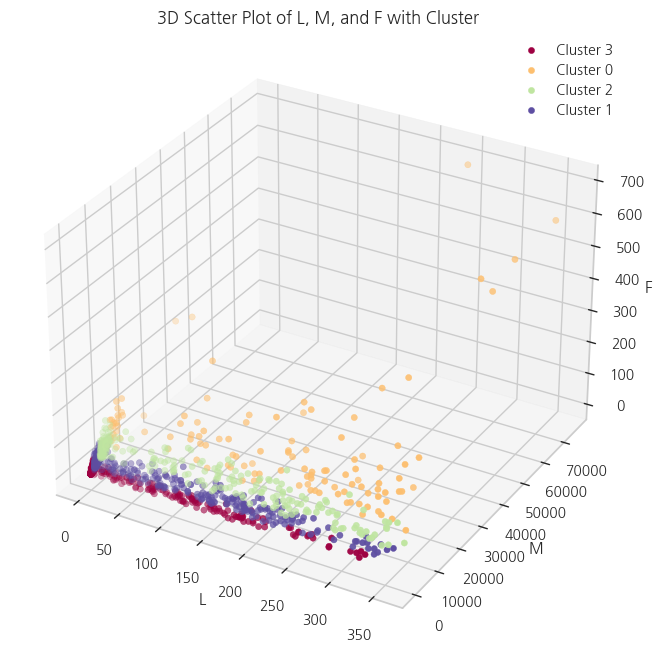

In [114]:
# 3차원 그래프 그리기
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 군집별로 색상을 지정하기 위한 팔레트 생성
palette = plt.cm.Spectral(np.linspace(0, 1, len(df_g['군집'].unique())))

# 군집별로 데이터 포인트를 다른 색상으로 표시
for i, cluster in enumerate(df_g['군집'].unique()):
    cluster_data = df_g[df_g['군집'] == cluster]
    ax.scatter(cluster_data['L'], cluster_data['M'], cluster_data['F'], color=palette[i], label=f'Cluster {cluster}')

ax.set_xlabel('L')
ax.set_ylabel('M')
ax.set_zlabel('F')
ax.set_title('3D Scatter Plot of L, M, and F with Cluster')
ax.legend()
plt.show()

## 군집 해석

#### 1. 군집 내 유저수

Text(0, 0.5, '군집내 유저 수')

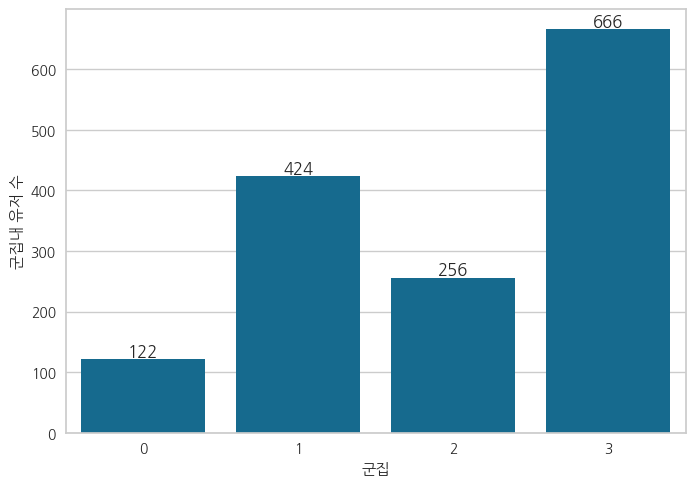

In [50]:
ax = sns.barplot(x='index', y='군집', data=data['군집'].value_counts().reset_index())
ax.bar_label(ax.containers[0])
plt.xlabel('군집')
plt.ylabel('군집내 유저 수')

#### 2. 군집별 소비금액

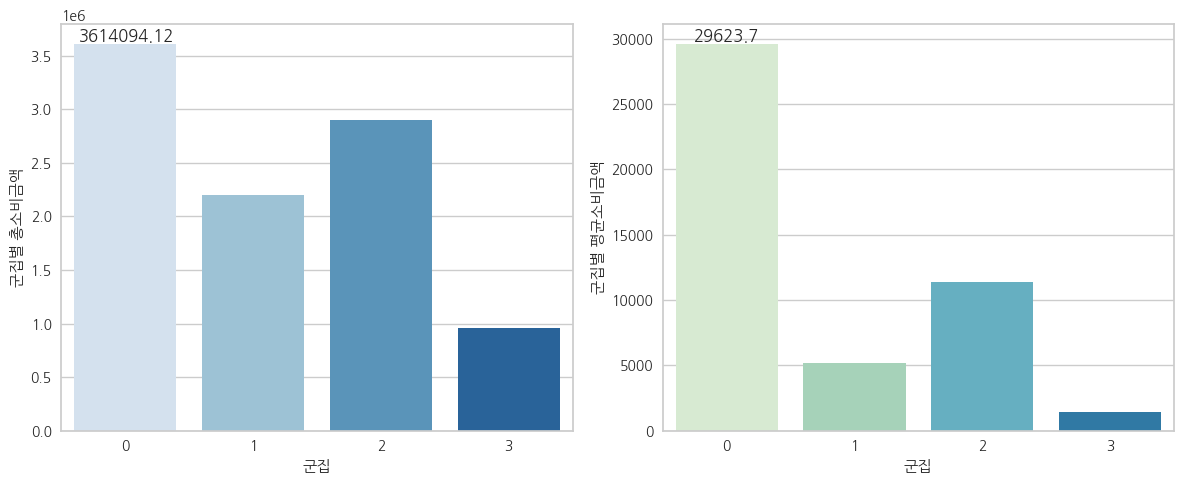

In [51]:
# 군집별 총 소비금액
plt.figure(figsize=(12,5))
plt.subplot(121)
ax = sns.barplot(x='index', y=0, data=data.groupby('군집').sum().reset_index().sum(axis='columns').reset_index(), palette = 'Blues')
ax.bar_label(ax.containers[0], fmt='%3.2f')
plt.xlabel('군집')
plt.ylabel('군집별 총소비금액')
plt.tight_layout()

plt.subplot(122)
ax = sns.barplot(x='index', y=0, data=data.groupby('군집').mean().reset_index().sum(axis='columns').reset_index(), palette = 'GnBu')
ax.bar_label(ax.containers[0])
plt.xlabel('군집')
plt.ylabel('군집별 평균소비금액')
plt.tight_layout()

Text(0, 0.5, '군집별 평균소비금액')

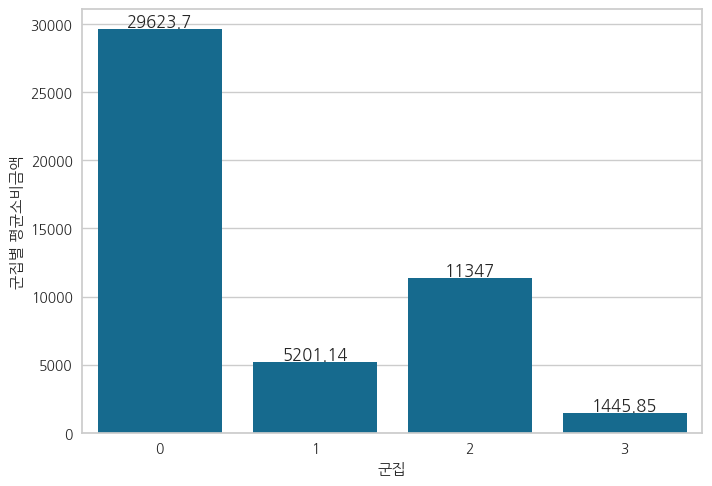

In [52]:
# 군집별 평균소비금액
ax = sns.barplot(x='index', y=0, data=data.groupby('군집').mean().reset_index().sum(axis='columns').reset_index())
ax.bar_label(ax.containers[0])
plt.xlabel('군집')
plt.ylabel('군집별 평균소비금액')

#### 3. 군집별 LRFMV

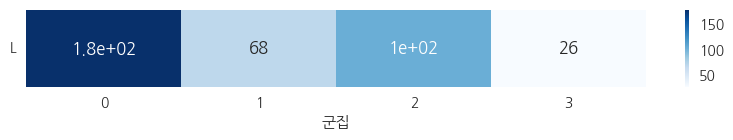

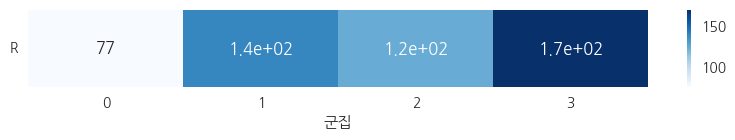

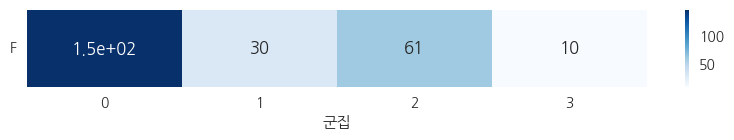

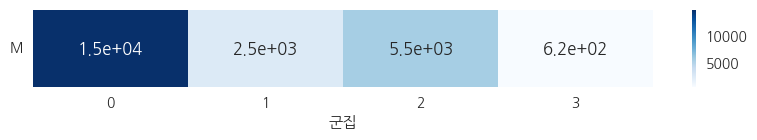

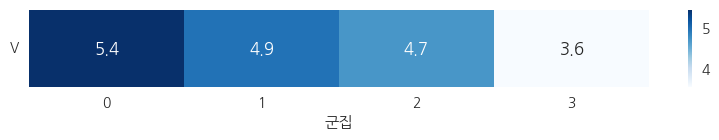

In [53]:
# 군집별 LRFMV 살펴보기
for i in range(17,22):
    plt.figure(figsize=(10,1))
    sns.heatmap(data.groupby('군집').mean().reset_index().iloc[:,i:i+1].transpose(), cmap='Blues', annot=True)#, fmt='0f')
    plt.xlabel('군집')
    plt.yticks(rotation=0)

#### 4. 군집별 쿠폰민감도

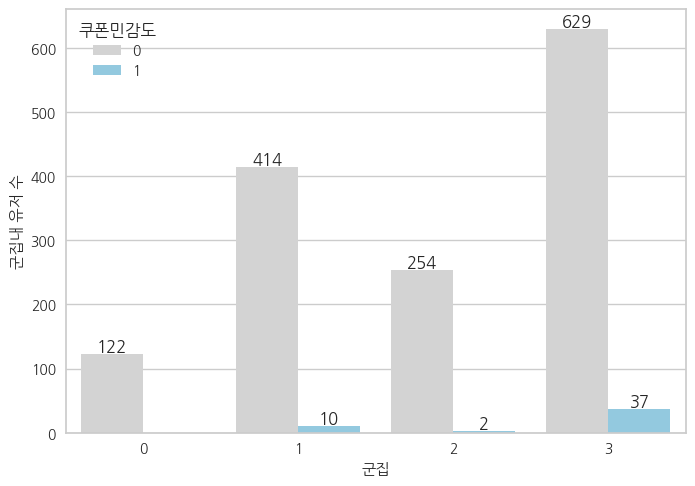

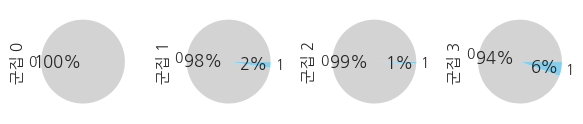

In [54]:
ax_cp = sns.barplot(data.groupby(['군집','쿠폰민감도'])['고객ID'].count().reset_index(), x='군집', y='고객ID', hue='쿠폰민감도',palette = ['lightgray','skyblue'])
ax_cp.bar_label(ax_cp.containers[0])
ax_cp.bar_label(ax_cp.containers[1])
plt.xlabel('군집')
plt.ylabel('군집내 유저 수')

plt.figure(figsize=(6,2))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    #print(f'********* 군집 : {i} ********')
    data[data['군집']==i]['쿠폰민감도'].value_counts().plot(kind='pie', autopct='%.0f%%', label=f'군집 {i}', colors=['lightgray','skyblue'])
plt.tight_layout()

#### 5. 군집별 이용패턴

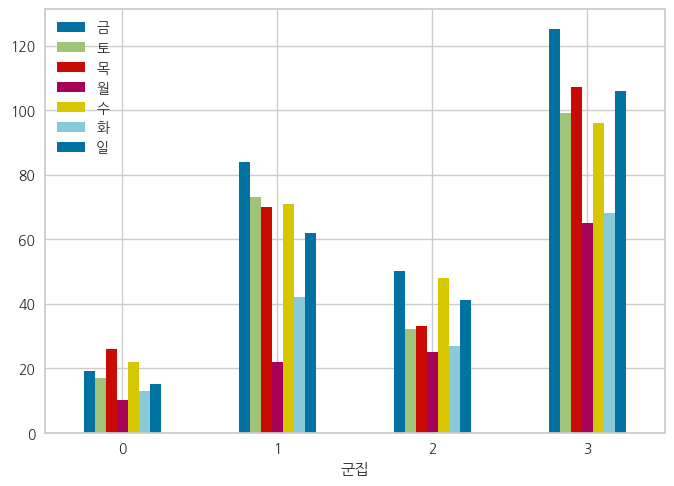

In [55]:
data.pivot_table(index='군집', columns='이용패턴',values='고객ID', aggfunc='count').fillna(0).reset_index().iloc[:,1:].plot.bar()
plt.xticks(rotation=0)
plt.xlabel('군집')
plt.legend(['금','토','목','월','수','화','일'])

#### 6. 군집별 마케팅 반응도

Text(0.5, 0, '군집')

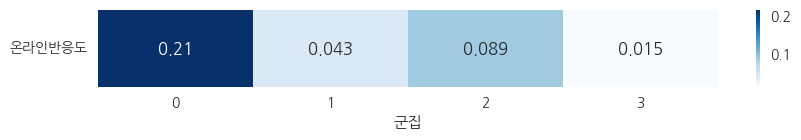

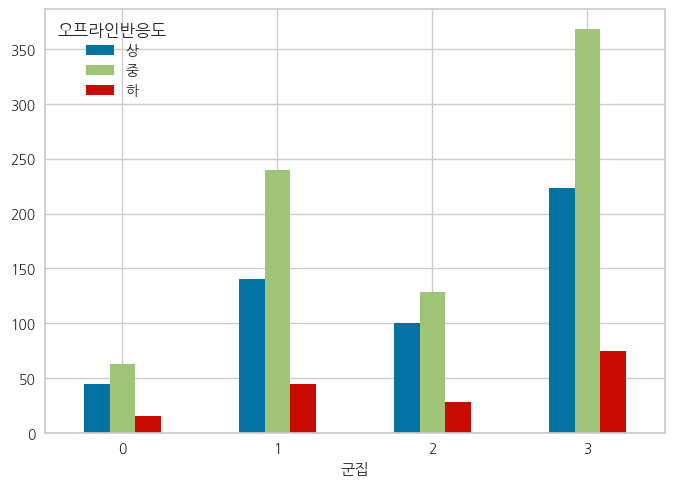

In [56]:
# 군집별 마케팅 반응도 알아보기
plt.figure(figsize=(10,1))
sns.heatmap(data.groupby('군집').mean().reset_index().iloc[:,24:25].transpose(), cmap='Blues', annot=True)
plt.xlabel('군집')
plt.yticks(rotation=0)

data.pivot_table(index='군집', columns='오프라인반응도',values='고객ID', aggfunc='count').fillna(0).reset_index().iloc[:,1:].plot.bar()
plt.xticks(rotation=0)
plt.xlabel('군집')

#### 7. 군집별 카테고리 소비금액

In [57]:
data.groupby('군집').sum().reset_index().iloc[:,1:17]

,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,4065.46,151.50,242443.94,64324.22,2320.81,85577.33,7123.65,37432.05,1790.60,28710.92,210888.71,20138.10,890993.16,66119.51,110945.89,2724.95
1,956.93,210.37,126265.84,34766.54,1446.81,42282.94,4083.33,5010.92,1713.65,17593.19,98991.59,20807.35,616568.85,15918.64,60557.91,1055.22
2,2018.48,266.01,156745.43,40009.83,2159.57,51354.73,6638.68,7906.01,763.97,20255.16,173747.82,23773.88,819752.28,18382.48,84957.29,1946.83
3,255.01,83.15,65690.59,12213.84,996.46,21492.83,1688.16,3122.46,369.10,7826.43,34565.38,6191.07,226888.10,6665.33,20333.31,584.94


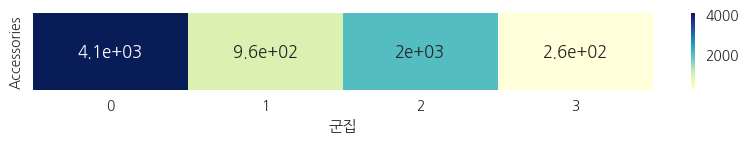

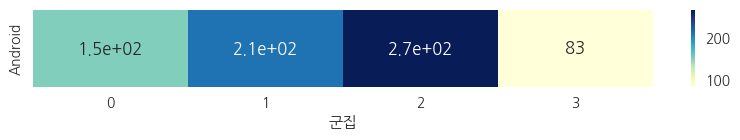

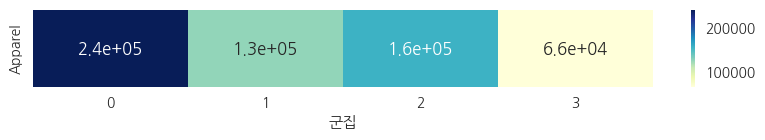

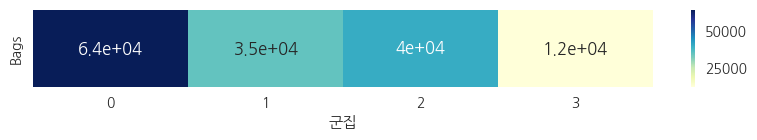

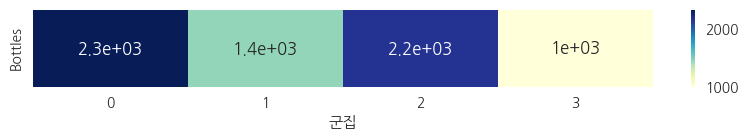

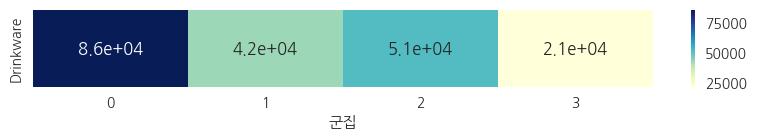

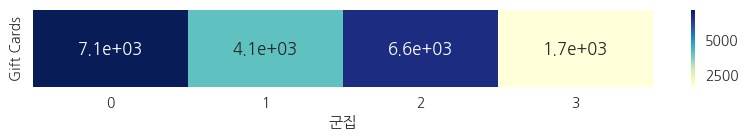

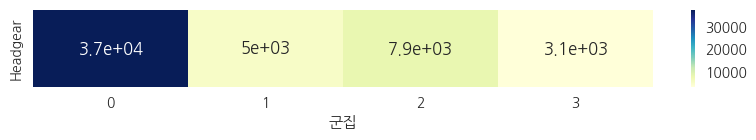

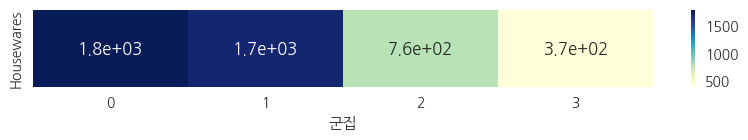

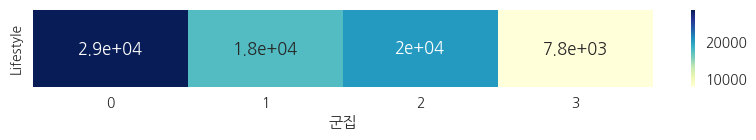

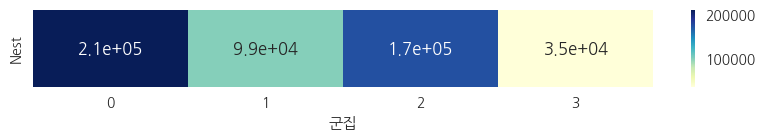

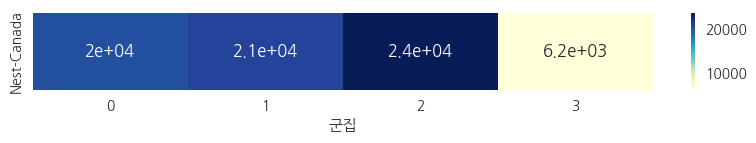

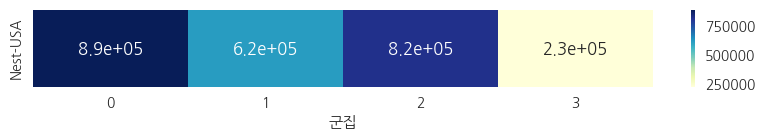

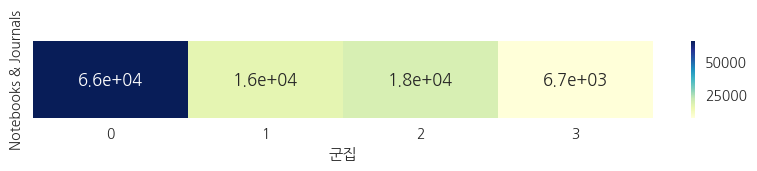

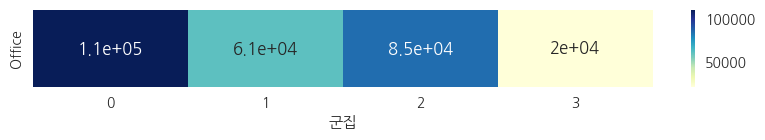

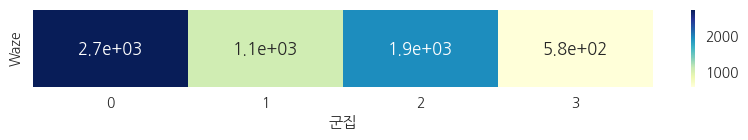

In [58]:
# 군집별 각 카테고리 소비금액 정도 알아보기
for i in range(1,17):
    plt.figure(figsize=(10,1))
    sns.heatmap(data.groupby('군집').sum().reset_index().iloc[:,i:i+1].transpose(), cmap='YlGnBu', annot=True)
    plt.xlabel('군집')
    #plt.yticks(rotation=0)

#### 8. 군집별 고객정보

In [59]:
data_cstm = data.merge(cstm, on='고객ID')

##### 성별

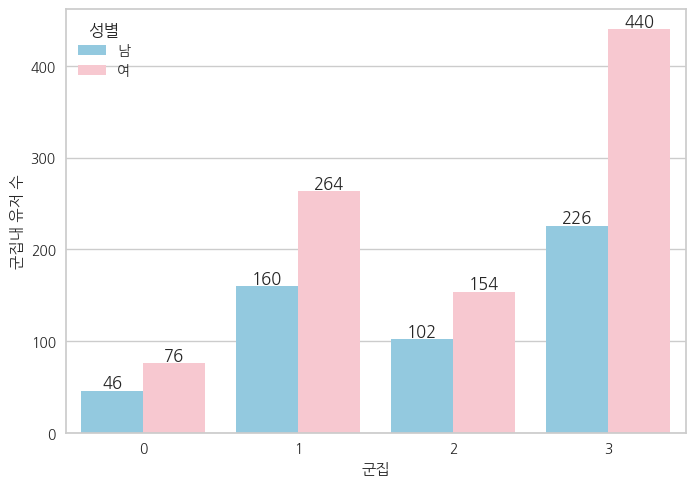

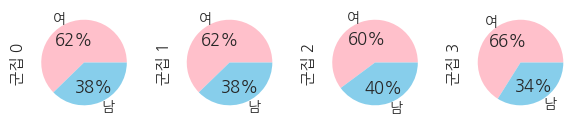

In [60]:
clst = 4

ax_sex = sns.barplot(data_cstm.groupby(['군집','성별'])['고객ID'].count().reset_index(), x='군집', y='고객ID', hue='성별',palette = ['skyblue','pink'])
ax_sex.bar_label(ax_sex.containers[0])
ax_sex.bar_label(ax_sex.containers[1])
plt.xlabel('군집')
plt.ylabel('군집내 유저 수')

plt.figure(figsize=(6,2))
for i in range(0,clst):
    plt.subplot(1,clst,i+1)
    #print(f'********* 군집 : {i} ********')
    data_cstm[data_cstm['군집']==i]['성별'].value_counts().plot(kind='pie', autopct='%.0f%%', label=f'군집 {i}', colors=['pink','skyblue'])
plt.tight_layout()

##### 고객지역

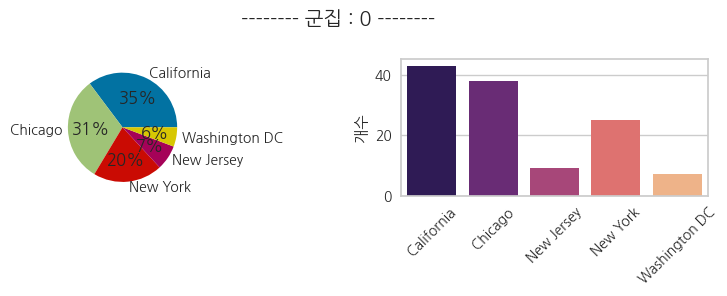

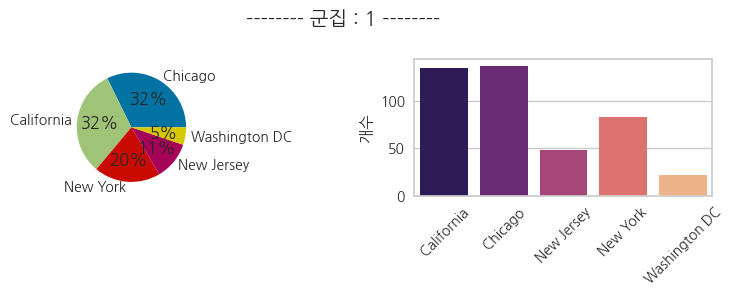

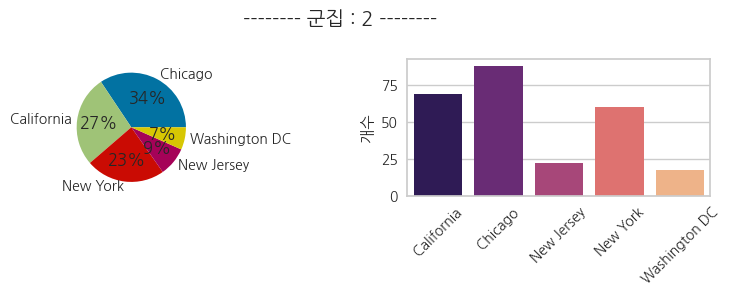

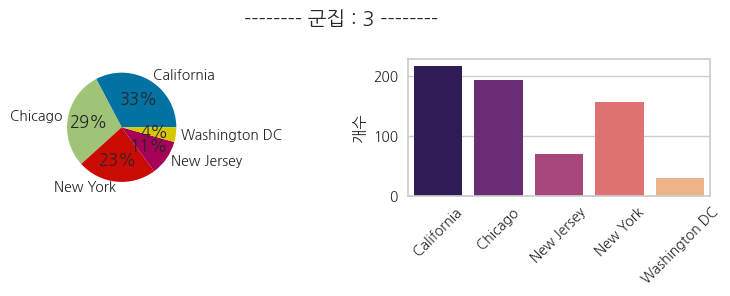

In [61]:
clst = 4
for i in range(0,clst):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'-------- 군집 : {i} --------')
    plt.subplot(121)
    data_cstm[data_cstm['군집']==i]['고객지역'].value_counts().plot(kind='pie', autopct='%.0f%%')
    plt.ylabel('')
    plt.subplot(122)
    ax_rg = sns.barplot(data_cstm[data_cstm['군집']==i].groupby(['고객지역'])['고객ID'].count().reset_index(), x='고객지역', y='고객ID', palette='magma')
    #ax_rg.bar_label(ax_rg.containers[0])
    #ax_rg.bar_label(ax_rg.containers[1])
    plt.xlabel('')
    plt.ylabel('개수')
    plt.xticks(rotation=45)
    plt.tight_layout()



##### 가입기간

Text(0, 0.5, 'Count')

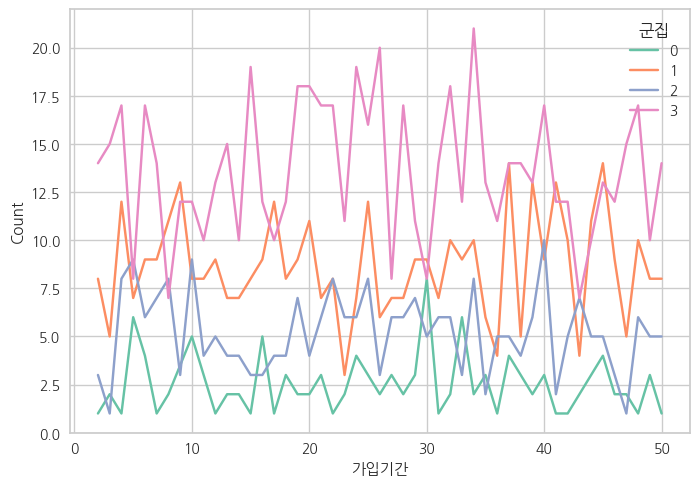

In [62]:
# 군집별 가입기간별 개수
sns.lineplot(data_cstm.groupby(['군집','가입기간'])['고객ID'].count().reset_index(), x='가입기간', y='고객ID', hue='군집', palette='Set2')
plt.ylabel('Count')

[Text(0, 0, '25.8784')]

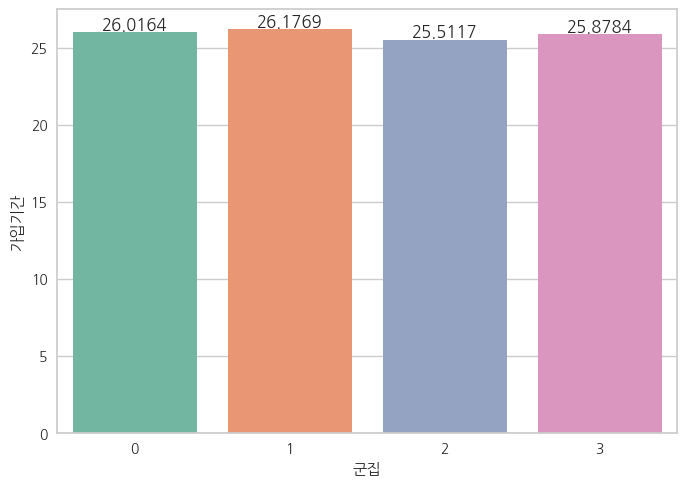

In [63]:
# 군집별 평균 가입기간
ax_join = sns.barplot(data_cstm.groupby('군집')['가입기간'].mean(), palette='Set2')
ax_join.bar_label(ax_join.containers[0])
ax_join.bar_label(ax_join.containers[1])
ax_join.bar_label(ax_join.containers[2])
ax_join.bar_label(ax_join.containers[3])

#### 9. 군집별 장바구니 분석

##### "군집 2" 고객군의 장바구니 분석

In [64]:
!pip install mlxtend

In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [66]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
df_b = sales[['고객ID', '거래날짜']]

# 군집 2에 속한 고객군만 장바구니 분석 해보겠음.
cluster_2_ids = data[data['군집'] == 2]['고객ID']  #군집 수정시 여기만 수정하면 됨.
df_b = df_b[df_b['고객ID'].isin(cluster_2_ids)]
df_b.head()

# 고객 ID와 거래 날짜로 그룹화한 후, 고객 ID와 거래 날짜를 기준으로 중복되는 값을 갖도록 거래 ID 부여
df_b['거래ID'] = df_b.groupby(['고객ID', '거래날짜']).ngroup() + 1
df_b.head()

,고객ID,거래날짜,거래ID
86,USER_0585,2019-01-01,279
87,USER_0585,2019-01-01,279
88,USER_0585,2019-01-01,279
89,USER_0585,2019-01-02,280
90,USER_0585,2019-01-02,280


In [68]:
df_b3= pd.concat([df_b['거래ID'], sales['제품카테고리']], axis=1)

# 각 거래 ID에 대해 해당하는 제품 카테고리를 추출하여 하나의 리스트에 묶음
grouped_categories = df_b3.groupby('거래ID')['제품카테고리'].apply(list)

# 모든 리스트를 하나의 리스트로 묶어 이중리스트 생성
final_list = grouped_categories.tolist()
print(final_list)

[['Google', 'Drinkware', 'Lifestyle', 'Lifestyle', 'Lifestyle', 'Lifestyle', 'Nest-USA', 'Drinkware', 'Nest-USA', 'Apparel', 'Apparel', 'Apparel', 'Apparel', 'Nest-USA', 'Nest-USA', 'Nest-USA', 'Nest-USA', 'Drinkware', 'Office', 'Office', 'Office', 'Apparel', 'Nest-USA', 'Apparel', 'Apparel', 'Apparel', 'Nest-Canada', 'Nest-Canada', 'Nest-USA', 'Apparel', 'Apparel', 'Office', 'Lifestyle', 'Apparel', 'Apparel', 'Nest-Canada', 'Apparel', 'Apparel', 'Lifestyle', 'Office', 'Bags', 'Bags', 'Office', 'Drinkware', 'Office', 'Office', 'Office', 'Lifestyle', 'Bags', 'Office', 'Nest-USA', 'Nest-USA', 'Apparel', 'Apparel', 'Apparel', 'Lifestyle', 'Lifestyle', 'Lifestyle', 'Office', 'Office', 'Office', 'Lifestyle', 'Office', 'Office', 'Nest-USA', 'Nest-USA', 'Drinkware', 'Office', 'Notebooks & Journals', 'Nest-USA', 'Nest-USA', 'Nest-USA', 'Nest-USA', 'Office', 'Notebooks & Journals', 'Apparel', 'Apparel', 'Bottles', 'Office', 'Nest-USA', 'Nest-USA', 'Office', 'Apparel'], ['Office', 'Apparel', 'Li

In [69]:
te = TransactionEncoder()
te_ary = te.fit(final_list).transform(final_list)
df_b4 = pd.DataFrame(te_ary, columns=te.columns_)

In [70]:
frequent_itemsets = apriori(df_b4, min_support=0.3, use_colnames=True)
frequent_itemsets
# 지지도(support) : 전체 항목 중(행들 중) x와 y를 모두 포함하는 경우의 비율

,support,itemsets
0,0.819035,(Apparel)
1,0.378016,(Bags)
2,0.495979,(Drinkware)
3,0.434316,(Lifestyle)
4,0.819035,(Nest-USA)
5,0.639410,(Office)
6,0.343164,"(Bags, Apparel)"
7,0.449062,"(Drinkware, Apparel)"
8,0.391421,"(Lifestyle, Apparel)"
9,0.693029,"(Nest-USA, Apparel)"


In [73]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9) #신뢰도 0.9이상인 경우만 보기
#confiddence(신뢰도): A를 포함하는 거래 중 A와 B가 동시에 거래되는 비중
#lift(향상도): A라는 상품에서 신뢰도가 동일한 상품 B와 C가 존재할 때, 어떤 상품을 더 추천해야 좋을지 판단.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bags),(Apparel),0.378016,0.819035,0.343164,0.907801,1.108379,0.033555,1.962776,0.157210
1,(Drinkware),(Apparel),0.495979,0.819035,0.449062,0.905405,1.105454,0.042838,1.913060,0.189266
2,(Lifestyle),(Apparel),0.434316,0.819035,0.391421,0.901235,1.100362,0.035701,1.832272,0.161235
3,(Bags),(Nest-USA),0.378016,0.819035,0.345845,0.914894,1.117039,0.036236,2.126340,0.168454
4,(Drinkware),(Nest-USA),0.495979,0.819035,0.454424,0.916216,1.118654,0.048200,2.159907,0.210444
5,"(Nest-USA, Bags)",(Apparel),0.345845,0.819035,0.320375,0.926357,1.131034,0.037117,2.457316,0.177104
6,"(Bags, Apparel)",(Nest-USA),0.343164,0.819035,0.320375,0.933594,1.139871,0.039312,2.725122,0.186816
7,"(Drinkware, Nest-USA)",(Apparel),0.454424,0.819035,0.420912,0.926254,1.130909,0.048723,2.453887,0.212171
8,"(Drinkware, Apparel)",(Nest-USA),0.449062,0.819035,0.420912,0.937313,1.144412,0.053114,2.886825,0.229044
9,"(Drinkware, Office)",(Apparel),0.416890,0.819035,0.388740,0.932476,1.138506,0.047292,2.680008,0.208633


In [76]:
ar = list(frequent_itemsets['itemsets'][6:19])
df_br = pd.DataFrame(list(ar), columns=['FROM', 'TO'])

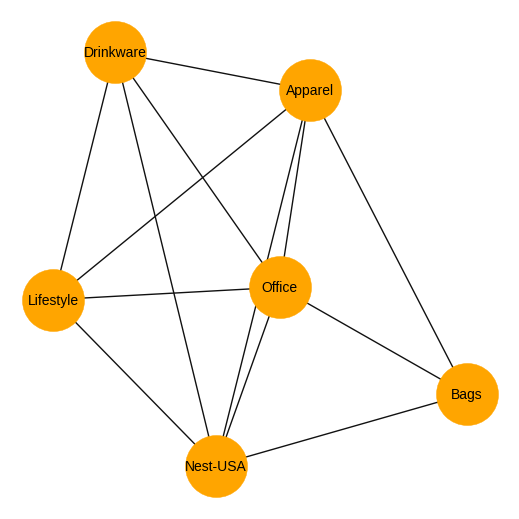

In [77]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

G = nx.from_pandas_edgelist(df_br, source = 'FROM', target = 'TO')

# 품목 연관 시각화
plt.figure(figsize=(5,5))
nx.draw_kamada_kawai(G)
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)
plt.show()

##### 중저인기 품목 장바구니 분석

In [84]:
df_bm = sales[['고객ID', '거래날짜', '제품카테고리']]

#장바구니에 등장횟수가 적은 중저인기도 품목만 제한
df_bm = df_bm[(df_bm['제품카테고리']!='Apparel')&(df_bm['제품카테고리']!='Nest-USA')&(df_bm['제품카테고리']!='Office')&(df_bm['제품카테고리']!='Drinkware')&(df_bm['제품카테고리']!='Lifestyle')]

df_bm2 = df_bm[['고객ID', '거래날짜']]
# 고객 ID와 거래 날짜로 그룹화한 후, 고객 ID와 거래 날짜를 기준으로 중복되는 값을 갖도록 거래 ID 부여
df_bm2['거래ID'] = df_bm2.groupby(['고객ID', '거래날짜']).ngroup() + 1
df_bm2.head()

df_bm3= pd.concat([df_bm2['거래ID'], df_bm['제품카테고리']], axis=1)

# 각 거래 ID에 대해 해당하는 제품 카테고리를 추출하여 하나의 리스트에 묶음
grouped_categories_m = df_bm3.groupby('거래ID')['제품카테고리'].apply(list)

# 모든 리스트를 하나의 리스트로 묶어 이중리스트 생성
final_list_m = grouped_categories_m.tolist()
print(final_list_m)



[['Bags', 'Headgear', 'Bags', 'Google'], ['Nest', 'Accessories', 'Nest'], ['Bags'], ['Bags'], ['Nest-Canada', 'Nest-Canada', 'Headgear', 'Headgear'], ['Nest', 'Bags', 'Nest'], ['Headgear'], ['Google', 'Nest-Canada', 'Nest-Canada', 'Nest-Canada', 'Bags', 'Bags', 'Bags', 'Notebooks & Journals', 'Notebooks & Journals', 'Bottles'], ['Bags', 'Bags'], ['Nest', 'Nest', 'Nest', 'Nest', 'Bags', 'Nest', 'Backpacks', 'Nest', 'Nest', 'Bags', 'Nest', 'Nest', 'Waze'], ['Notebooks & Journals', 'Notebooks & Journals', 'Notebooks & Journals', 'Gift Cards', 'Bags'], ['Backpacks', 'Bags', 'Waze', 'Waze', 'Notebooks & Journals', 'Notebooks & Journals', 'Notebooks & Journals'], ['Bags', 'Notebooks & Journals', 'Bottles'], ['Bags', 'Bottles', 'Nest', 'Bags', 'Nest'], ['Nest'], ['Bags'], ['Nest', 'Accessories', 'Nest-Canada', 'Nest'], ['Bags', 'Headgear'], ['Headgear'], ['Nest', 'Bags', 'Nest'], ['Bags', 'Notebooks & Journals', 'Headgear', 'Headgear', 'Bags', 'Headgear', 'Notebooks & Journals', 'Notebooks & 

In [85]:
te = TransactionEncoder()
te_ary = te.fit(final_list_m).transform(final_list_m)
df_bm4 = pd.DataFrame(te_ary, columns=te.columns_)

In [86]:
#min_support가 조정
frequent_itemsets2 = apriori(df_bm4, min_support=0.1, use_colnames=True)

In [87]:
association_rules(frequent_itemsets2, metric="lift", min_threshold=1) # 향상도가1 이상인 규칙만 보이게 조정

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Headgear),(Bags),0.265963,0.505041,0.150744,0.566787,1.122260,0.016422,1.142531,0.148413
1,(Bags),(Headgear),0.505041,0.265963,0.150744,0.298479,1.122260,0.016422,1.046351,0.220100
2,(Bags),(Notebooks & Journals),0.505041,0.232357,0.140182,0.277567,1.194568,0.022833,1.062579,0.329073
3,(Notebooks & Journals),(Bags),0.232357,0.505041,0.140182,0.603306,1.194568,0.022833,1.247710,0.212179


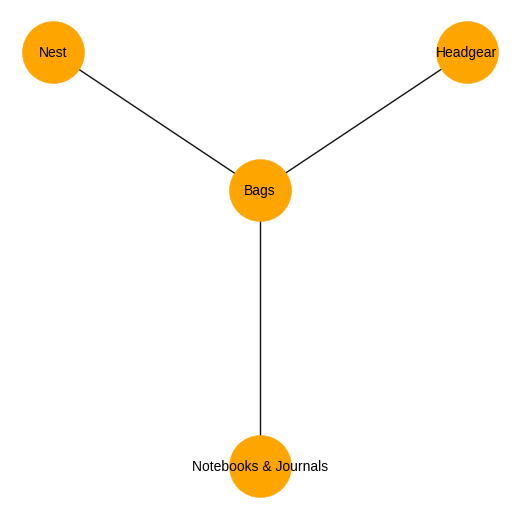

In [88]:
ar2 = list(frequent_itemsets2['itemsets'])

df_br5 = pd.DataFrame(list(ar2), columns=['FROM', 'TO'])
df_br6 = df_br5.iloc[7:10]

G = nx.from_pandas_edgelist(df_br6, source = 'FROM', target = 'TO')

# 품목 연관 시각화
plt.figure(figsize=(5,5))
nx.draw_kamada_kawai(G)
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)
plt.show()